In [1]:
import os
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_o = pd.read_csv('29634.13.02.2009.08.05.2021.1.0.0.ru.utf8.00000000.csv', skiprows=6, sep=';', index_col=0)

def inp_prep(df_o, col_drop_list=['P','Pa','ff3' , 'ff10', 'tR', 'E', 'Tg', 'E', 'sss', "E'", 'W1', 'W2', 'Unnamed: 29'], info=True, reverse=True):
    #clean cols
    dfa = df_o.drop(columns=col_drop_list)
    
    # replace NaN to mean of 2 nb
    dfa['T'] = dfa['T'].where(dfa['T'].values == 999, other=(dfa['T'].fillna(method='ffill') + dfa['T'].fillna(method='bfill'))/2)
    # datetimeindex
    dfa.index = pd.to_datetime(dfa.index, dayfirst=True)
    if info is True:
         dfa.info()
    if reverse is True:
        # reverse
        dfa = dfa.iloc[::-1]
   
    return dfa
dfa = inp_prep(df_o)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 15396 entries, 2021-05-08 19:00:00 to 2009-02-13 19:00:00
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   T       15396 non-null  float64
 1   Po      15376 non-null  float64
 2   U       15382 non-null  float64
 3   DD      15251 non-null  object 
 4   Ff      15384 non-null  float64
 5   N       15381 non-null  object 
 6   WW      15396 non-null  object 
 7   Tn      2457 non-null   float64
 8   Tx      1935 non-null   float64
 9   Cl      1650 non-null   object 
 10  Nh      2533 non-null   object 
 11  H       2539 non-null   object 
 12  Cm      1240 non-null   object 
 13  Ch      2154 non-null   object 
 14  VV      15391 non-null  float64
 15  Td      2981 non-null   float64
 16  RRR     3202 non-null   object 
dtypes: float64(8), object(9)
memory usage: 2.1+ MB


In [3]:
dfa.loc['2021-05'].tail(8)

,T,Po,U,DD,Ff,N,WW,Tn,Tx,Cl,Nh,H,Cm,Ch,VV,Td,RRR
Местное время в Новосибирске,,,,,,,,,,,,,,,,,
2021-05-07 22:00:00,14.7,749.0,32.0,"Штиль, безветрие",0.0,70 – 80%.,"Видимость ухудшена дымом, например: от степных...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN
2021-05-08 01:00:00,11.9,751.0,38.0,"Ветер, дующий с северо-запада",1.0,60%.,"Видимость ухудшена дымом, например: от степных...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN
2021-05-08 04:00:00,8.3,752.0,53.0,"Штиль, безветрие",0.0,70 – 80%.,"Видимость ухудшена дымом, например: от степных...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN
2021-05-08 07:00:00,7.8,753.0,52.0,"Ветер, дующий с запада",1.0,Облаков нет.,"Видимость ухудшена дымом, например: от степных...",6.1,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,Осадков нет
2021-05-08 10:00:00,15.9,752.0,27.0,"Ветер, дующий с запада",1.0,Облаков нет.,"Видимость ухудшена дымом, например: от степных...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN
2021-05-08 13:00:00,19.5,751.0,26.0,"Ветер, дующий с северо-запада",4.0,60%.,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN
2021-05-08 16:00:00,20.1,751.0,25.0,"Ветер, дующий с северо-запада",4.0,"90 или более, но не 100%",,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN
2021-05-08 19:00:00,21.1,750.0,24.0,"Ветер, дующий с северо-запада",3.0,70 – 80%.,"Видимость ухудшена дымом, например: от степных...",NaN,21.2,NaN,NaN,NaN,NaN,NaN,4.0,NaN,Осадков нет


In [4]:
# Nh # H # Cm # Ch # Td
dfa[~dfa['Td'].isnull()]['H'].tail(5)

Местное время в Новосибирске
2011-04-28 07:00:00                           1000-1500
2011-04-30 10:00:00    2500 или более, или облаков нет.
2011-04-30 13:00:00    2500 или более, или облаков нет.
2011-04-30 16:00:00    2500 или более, или облаков нет.
2011-04-30 19:00:00    2500 или более, или облаков нет.
Name: H, dtype: object

In [5]:
dfa['DD'].unique()

array(['Ветер, дующий с востоко-юго-востока', 'Ветер, дующий с востока',
       'Ветер, дующий с севера', 'Ветер, дующий с юго-юго-запада',
       'Ветер, дующий с юго-запада', 'Штиль, безветрие',
       'Ветер, дующий с северо-северо-запада',
       'Ветер, дующий с северо-запада',
       'Ветер, дующий с северо-северо-востока',
       'Ветер, дующий с северо-востока', 'Ветер, дующий с юга',
       'Ветер, дующий с западо-юго-запада',
       'Ветер, дующий с юго-юго-востока', 'Ветер, дующий с запада',
       'Ветер, дующий с западо-северо-запада',
       'Ветер, дующий с востоко-северо-востока',
       'Ветер, дующий с юго-востока', nan], dtype=object)

<AxesSubplot:ylabel='DD'>

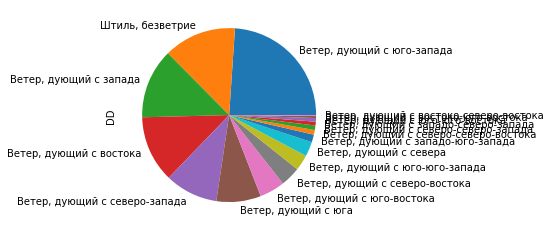

In [6]:
dfa['DD'].value_counts().plot(kind='pie')

In [7]:
dfa['DD'].value_counts()

Ветер, дующий с юго-запада                3649
Штиль, безветрие                          2059
Ветер, дующий с запада                    1980
Ветер, дующий с востока                   1889
Ветер, дующий с северо-запада             1502
Ветер, дующий с юга                       1261
Ветер, дующий с юго-востока                716
Ветер, дующий с северо-востока             564
Ветер, дующий с юго-юго-запада             446
Ветер, дующий с севера                     417
Ветер, дующий с западо-юго-запада          215
Ветер, дующий с северо-северо-востока      132
Ветер, дующий с северо-северо-запада       129
Ветер, дующий с западо-северо-запада       106
Ветер, дующий с юго-юго-востока            102
Ветер, дующий с востоко-юго-востока         56
Ветер, дующий с востоко-северо-востока      28
Name: DD, dtype: int64

In [8]:
# Winter period
dfa.loc['2020-11-01':'2021-03-01']['DD'].value_counts()

Ветер, дующий с юго-запада        319
Штиль, безветрие                  217
Ветер, дующий с запада            125
Ветер, дующий с востока           103
Ветер, дующий с северо-запада      60
Ветер, дующий с юга                59
Ветер, дующий с юго-востока        28
Ветер, дующий с северо-востока     20
Ветер, дующий с севера              5
Name: DD, dtype: int64

<AxesSubplot:>

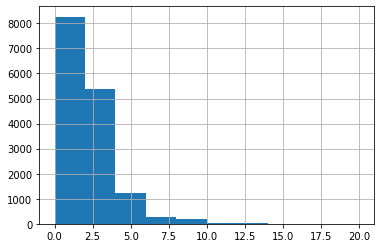

In [9]:
dfa['Ff'][dfa['Ff'] <= 50].hist(bins=10)

In [10]:
dfa['N'].value_counts()

100%.                                                                 6775
Облаков нет.                                                          2573
70 – 80%.                                                             2070
60%.                                                                  1202
90  или более, но не 100%                                              949
20–30%.                                                                870
40%.                                                                   765
10%  или менее, но не 0                                                112
50%.                                                                    58
Небо не видно из-за тумана и/или других метеорологических явлений.       7
Name: N, dtype: int64

In [11]:
# Winter period
dfa.loc['2020-11-01':'2021-03-01']['N'].value_counts()

100%.                        550
Облаков нет.                 161
70 – 80%.                     75
90  или более, но не 100%     47
60%.                          39
40%.                          31
20–30%.                       27
10%  или менее, но не 0        3
Name: N, dtype: int64

### function for convert category data

In [12]:
def conv_wind(dfa):
    m_df4_ = dfa['DD'].replace(['Ветер, дующий с запада', 'Ветер, дующий с юго-запада', 'Ветер, дующий с западо-юго-запада', 'Ветер, дующий с западо-северо-запада'],'West')
    m_df4_ = m_df4_.replace(['Ветер, дующий с севера', 'Ветер, дующий с северо-запада', 'Ветер, дующий с северо-северо-востока', 'Ветер, дующий с северо-северо-запада'],'North')
    m_df4_ = m_df4_.replace(['Ветер, дующий с востока', 'Ветер, дующий с северо-востока', 'Ветер, дующий с востоко-юго-востока', 'Ветер, дующий с востоко-северо-востока'],'East')
    m_df4_ = m_df4_.replace(['Ветер, дующий с юга', 'Ветер, дующий с юго-востока', 'Ветер, дующий с юго-юго-запада', 'Ветер, дующий с юго-юго-востока'],'South')
    m_df4_ = m_df4_.replace(['Штиль, безветрие'],'Calm')
    m_df4 = dfa.copy()
    m_df4['DD'] = m_df4_
    m_df4['DD'].unique()
    return m_df4
m_df4 = conv_wind(dfa)

In [13]:
# clouds values to float type
def conv_cloud(dfa):
    m_df4_ = dfa['N'].replace(['70 – 80%.'],75)
    m_df4_ = m_df4_.replace(['90  или более, но не 100%'],90)
    m_df4_ = m_df4_.replace(['60%.'],60)
    m_df4_ = m_df4_.replace(['100%.'], 100)
    m_df4_ = m_df4_.replace(['Облаков нет.'],0)
    m_df4_ = m_df4_.replace(['40%.'],40)
    m_df4_ = m_df4_.replace(['20–30%.'],25)
    m_df4_ = m_df4_.replace(['10%  или менее, но не 0'],10)
    m_df4_ = m_df4_.replace(['50%.'],50)
    m_df4_ = m_df4_.replace(['Небо не видно из-за тумана и/или других метеорологических явлений.'],101)
    m_df4 = dfa.copy()
    m_df4['N'] = m_df4_
    m_df4['N'].unique()
    return m_df4

In [14]:
#precip values to float type
def conv_precip(dfa):
    m_df4_ = dfa['RRR'].replace(['Осадков нет'],0)
    m_df4_ = m_df4_.replace(['Следы осадков'],0.1)
    m_df4_ = m_df4_.astype(float)
    m_df4 = dfa.copy()
    m_df4['RRR'] = m_df4_
    return m_df4

In [15]:
#conv_wind_label
def conv_wind_label(dfa):
    m_df4_ = dfa['DD'].replace(['West'],1)
    m_df4_ = m_df4_.replace(['North'],2)
    m_df4_ = m_df4_.replace(['East'],3)
    m_df4_ = m_df4_.replace(['South'],4)
    m_df4_ = m_df4_.replace(['Calm'],0)
    m_df4 = dfa.copy()
    m_df4['DD'] = m_df4_
    m_df4['DD'].unique()
    return m_df4

<AxesSubplot:ylabel='DD'>

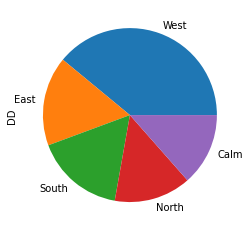

In [16]:
m_df4['DD'].value_counts().plot(kind='pie')

<AxesSubplot:ylabel='DD'>

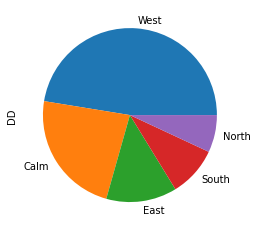

In [17]:
# Winter period
m_df4.loc['2020-11-01':'2021-03-01']['DD'].value_counts().plot(kind='pie')

In [18]:
# Тюмень
df_t = pd.read_csv('28367.01.02.2005.13.05.2021.1.0.0.ru.utf8.00000000.csv', skiprows=6, sep=';', index_col=0)

df_t = inp_prep(df_t, ['ff3', 'ff10', 'E', 'Tg', 'E', "E'", 'W1', 'W2', 'Unnamed: 29'])

C:\Users\Dima\AppData\Roaming\Python\Python36\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (21,28) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 47387 entries, 2021-05-13 11:00:00 to 2005-02-01 05:00:00
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   T       47387 non-null  float64
 1   Po      47201 non-null  float64
 2   P       47238 non-null  float64
 3   Pa      24195 non-null  float64
 4   U       47299 non-null  float64
 5   DD      47370 non-null  object 
 6   Ff      47370 non-null  float64
 7   N       47306 non-null  object 
 8   WW      47387 non-null  object 
 9   Tn      6417 non-null   float64
 10  Tx      8682 non-null   float64
 11  Cl      29553 non-null  object 
 12  Nh      38958 non-null  object 
 13  H       39022 non-null  object 
 14  Cm      28933 non-null  object 
 15  Ch      25800 non-null  object 
 16  VV      47298 non-null  object 
 17  Td      47325 non-null  float64
 18  RRR     10918 non-null  object 
 19  tR      10918 non-null  float64
 20  sss     2637 non-null   object 
dtype

In [19]:
df_t.loc['2021-01'].tail(8)

,T,Po,P,Pa,U,DD,Ff,N,WW,Tn,...,Cl,Nh,H,Cm,Ch,VV,Td,RRR,tR,sss
Местное время в Тюмени,,,,,,,,,,,,,,,,,,,,,
2021-01-31 02:00:00,-6.8,753.8,763.6,-0.3,81.0,"Ветер, дующий с юго-юго-востока",1.0,100%.,,NaN,...,"Слоисто-кучевых, слоистых, кучевых или кучево-...",100%.,"2500 или более, или облаков нет.","Высококучевые просвечивающие, полосами, либо о...",NaN,10.0,-9.5,NaN,NaN,NaN
2021-01-31 05:00:00,-7.7,754.0,763.9,0.2,84.0,"Ветер, дующий с юга",1.0,"90 или более, но не 100%",,NaN,...,"Слоисто-кучевых, слоистых, кучевых или кучево-...",70 – 80%.,"2500 или более, или облаков нет.","Высококучевые просвечивающие, расположенные на...","Перистые нитевидные, иногда когтевидные, не ра...",10.0,-10.0,NaN,NaN,NaN
2021-01-31 08:00:00,-9.9,754.3,764.3,0.3,90.0,"Ветер, дующий с юга",1.0,40%.,Облака в целом рассеиваются или становятся мен...,-9.9,...,"Слоисто-кучевых, слоистых, кучевых или кучево-...",20–30%.,"2500 или более, или облаков нет.","Высококучевые просвечивающие, расположенные на...",Перистые плотные в виде клочьев или скрученных...,10.0,-11.2,Следы осадков,12.0,26.0
2021-01-31 11:00:00,-8.6,755.8,765.7,1.5,86.0,"Ветер, дующий с западо-юго-запада",2.0,100%.,Облака в целом образовывались или развивались.,-10.4,...,Слоистые разорванные или кучевые разорванные о...,20–30%.,300-600,"Высококучевые, просвечивающие или плотные в дв...",NaN,10.0,-10.6,NaN,NaN,NaN
2021-01-31 14:00:00,-7.2,756.6,766.5,0.8,76.0,"Ветер, дующий с западо-юго-запада",2.0,70 – 80%.,Состояние неба в общем не изменилось.,NaN,...,"Слоисто-кучевых, слоистых, кучевых или кучево-...",40%.,"2500 или более, или облаков нет.","Высококучевые, просвечивающие или плотные в дв...","Перистые нитевидные, иногда когтевидные, не ра...",10.0,-10.7,NaN,NaN,NaN
2021-01-31 17:00:00,-8.7,757.7,767.7,1.1,80.0,"Ветер, дующий с запада",1.0,60%.,Состояние неба в общем не изменилось.,NaN,...,"Слоисто-кучевых, слоистых, кучевых или кучево-...",20–30%.,"2500 или более, или облаков нет.",Высокослоистые непросвечивающие или слоисто-до...,"Перистые нитевидные, иногда когтевидные, не ра...",10.0,-11.6,NaN,NaN,NaN
2021-01-31 20:00:00,-13.7,758.2,768.4,0.5,89.0,"Штиль, безветрие",0.0,40%.,,NaN,...,"Слоисто-кучевых, слоистых, кучевых или кучево-...",Облаков нет.,"2500 или более, или облаков нет.","Высококучевых, высокослоистых или слоисто-дожд...","Перистые нитевидные, иногда когтевидные, не ра...",10.0,-15.2,Следы осадков,12.0,NaN
2021-01-31 23:00:00,-15.1,757.8,768.0,-0.4,87.0,"Ветер, дующий с востока",1.0,20–30%.,,NaN,...,"Слоисто-кучевых, слоистых, кучевых или кучево-...",Облаков нет.,"2500 или более, или облаков нет.","Высококучевых, высокослоистых или слоисто-дожд...","Перистые нитевидные, иногда когтевидные, не ра...",10.0,-16.8,NaN,NaN,NaN


In [20]:
df_t4 = conv_wind(df_t)

<AxesSubplot:>

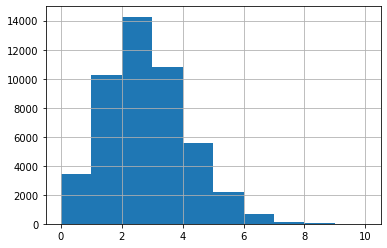

In [21]:
# Wind speed distribution
df_t['Ff'][df_t['Ff'] <= 50].hist(bins=10)

<AxesSubplot:xlabel='Местное время в Тюмени'>

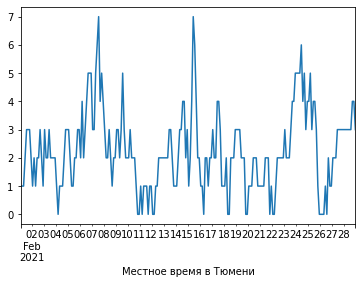

In [22]:
df_t.loc['2021-02']['Ff'][df_t['Ff'] <= 50].astype(float).plot()

<AxesSubplot:ylabel='DD'>

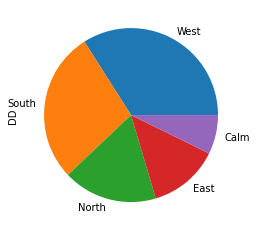

In [23]:
# Wind direction distrubuton
df_t4['DD'].value_counts().plot(kind='pie')

<AxesSubplot:ylabel='DD'>

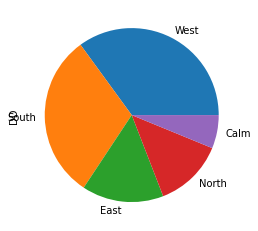

In [24]:
# Winter period
df_t4.loc['2020-11-01':'2021-03-01']['DD'].value_counts().plot(kind='pie')

<AxesSubplot:ylabel='DD'>

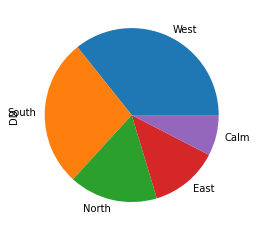

In [25]:
# Summer period
df_t4.loc['2020-05-01':'2021-10-01']['DD'].value_counts().plot(kind='pie')

<AxesSubplot:ylabel='N'>

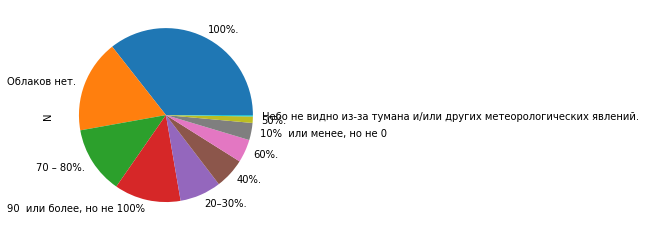

In [26]:
df_t4['N'].value_counts().plot(kind='pie')

<AxesSubplot:ylabel='N'>

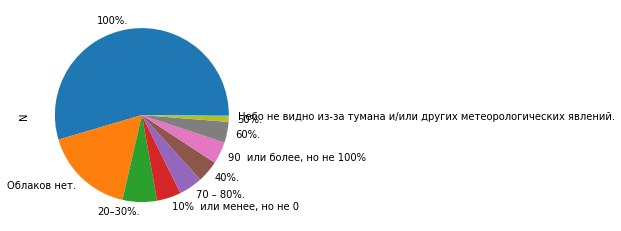

In [27]:
# Winter period
df_t4.loc['2020-11-01':'2021-03-01']['N'].value_counts().plot(kind='pie')

<AxesSubplot:ylabel='N'>

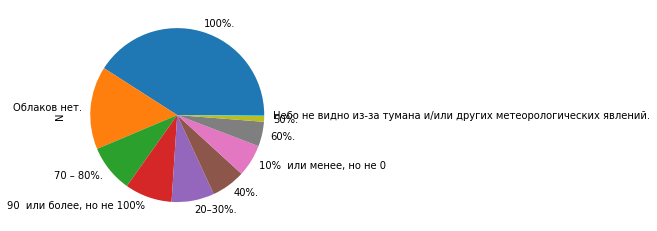

In [28]:
# Summer period
df_t4.loc['2020-05-01':'2021-10-01']['N'].value_counts().plot(kind='pie')

In [29]:
df_t4['N'].unique()

array(['70 – 80%.', '100%.', '40%.', 'Облаков нет.', '60%.', '20–30%.',
       '10%  или менее, но не 0', '50%.', '90  или более, но не 100%',
       'Небо не видно из-за тумана и/или других метеорологических явлений.',
       nan], dtype=object)

In [30]:
df_t4 = conv_cloud(df_t4)
df_t4 = conv_wind_label(df_t4)
df_t4 = conv_precip(df_t4)
df_t4.tail(5)

,T,Po,P,Pa,U,DD,Ff,N,WW,Tn,...,Cl,Nh,H,Cm,Ch,VV,Td,RRR,tR,sss
Местное время в Тюмени,,,,,,,,,,,,,,,,,,,,,
2021-05-12 23:00:00,10.1,760.2,769.4,0.1,70.0,0.0,0.0,10.0,,NaN,...,"Слоисто-кучевых, слоистых, кучевых или кучево-...",Облаков нет.,"2500 или более, или облаков нет.","Высококучевых, высокослоистых или слоисто-дожд...","Перистые нитевидные, иногда когтевидные, не ра...",10.0,4.8,NaN,NaN,NaN
2021-05-13 02:00:00,7.8,759.7,769.0,-0.5,79.0,0.0,0.0,40.0,,NaN,...,"Слоисто-кучевых, слоистых, кучевых или кучево-...",Облаков нет.,"2500 или более, или облаков нет.","Высококучевых, высокослоистых или слоисто-дожд...",Перистые плотные в виде клочьев или скрученных...,10.0,4.4,NaN,NaN,NaN
2021-05-13 05:00:00,9.6,759.4,768.7,-0.3,72.0,1.0,1.0,75.0,,NaN,...,"Слоисто-кучевых, слоистых, кучевых или кучево-...","10% или менее, но не 0","2500 или более, или облаков нет.","Высококучевые просвечивающие, расположенные на...","Перистые нитевидные, иногда когтевидные, не ра...",10.0,4.8,NaN,NaN,NaN
2021-05-13 08:00:00,17.9,758.8,767.8,-0.6,42.0,1.0,4.0,40.0,,7.3,...,"Слоисто-кучевых, слоистых, кучевых или кучево-...","10% или менее, но не 0","2500 или более, или облаков нет.","Высококучевые просвечивающие, расположенные на...","Перистые нитевидные, иногда когтевидные, не ра...",10.0,4.9,0.0,12.0,NaN
2021-05-13 11:00:00,24.4,758.1,766.9,-0.7,28.0,1.0,3.0,40.0,,NaN,...,"Слоисто-кучевых, слоистых, кучевых или кучево-...",Облаков нет.,"2500 или более, или облаков нет.","Высококучевых, высокослоистых или слоисто-дожд...","Перистые нитевидные, иногда когтевидные, не ра...",10.0,4.7,NaN,NaN,NaN


In [31]:
df_t4.corr()

,T,Po,P,Pa,U,DD,Ff,N,Tn,Tx,Td,RRR,tR
T,1.000000,-0.421402,-0.467369,-0.079396,-0.338533,-0.033683,0.105401,0.104634,0.967555,0.976683,0.938103,0.135821,-0.008124
Po,-0.421402,1.000000,0.997727,0.060487,-0.088976,-0.001512,-0.234167,-0.283388,-0.462821,-0.419279,-0.479182,-0.252925,0.006776
P,-0.467369,0.997727,1.000000,0.061128,-0.068751,0.000327,-0.233844,-0.281990,-0.506769,-0.463786,-0.520553,-0.253195,0.007012
Pa,-0.079396,0.060487,0.061128,1.000000,0.081072,-0.302507,-0.041250,-0.119040,-0.010844,-0.033157,-0.044442,0.027300,-0.022540
U,-0.338533,-0.088976,-0.068751,0.081072,1.000000,-0.060743,-0.312446,0.137838,-0.202405,-0.302365,-0.000989,0.228285,-0.004811
DD,-0.033683,-0.001512,0.000327,-0.302507,-0.060743,1.000000,0.143106,0.119374,-0.013344,-0.073843,-0.058843,-0.031169,0.007680
Ff,0.105401,-0.234167,-0.233844,-0.041250,-0.312446,0.143106,1.000000,0.251282,0.182801,-0.112678,0.003479,0.102524,-0.012546
N,0.104634,-0.283388,-0.281990,-0.119040,0.137838,0.119374,0.251282,1.000000,0.145749,0.039381,0.160296,0.159549,0.000488
Tn,0.967555,-0.462821,-0.506769,-0.010844,-0.202405,-0.013344,0.182801,0.145749,1.000000,NaN,0.966628,0.154137,NaN
Tx,0.976683,-0.419279,-0.463786,-0.033157,-0.302365,-0.073843,-0.112678,0.039381,NaN,1.000000,0.931561,0.140113,-0.006984


In [32]:
df_t4.loc['2021-03'].corr()

,T,Po,P,Pa,U,DD,Ff,N,Tn,Tx,Td,RRR,tR
T,1.000000,0.033896,0.000386,-0.161921,-0.468922,0.068427,0.415391,0.179532,0.970467,0.965183,0.813564,-0.140508,NaN
Po,0.033896,1.000000,0.999418,0.079670,-0.511077,-0.016947,0.007124,-0.342318,-0.112574,0.216776,-0.294345,-0.374874,NaN
P,0.000386,0.999418,1.000000,0.084890,-0.496233,-0.019210,-0.006784,-0.348453,-0.144137,0.190542,-0.322130,-0.371149,NaN
Pa,-0.161921,0.079670,0.084890,1.000000,0.163247,-0.430867,-0.015433,-0.188715,-0.001243,-0.155899,-0.059064,0.212346,NaN
U,-0.468922,-0.511077,-0.496233,0.163247,1.000000,-0.106651,-0.471056,0.156190,-0.295292,-0.457960,0.119778,0.400807,NaN
DD,0.068427,-0.016947,-0.019210,-0.430867,-0.106651,1.000000,0.049813,0.158619,0.034447,0.323257,0.005971,-0.207058,NaN
Ff,0.415391,0.007124,-0.006784,-0.015433,-0.471056,0.049813,1.000000,0.184992,0.354247,0.217351,0.165601,-0.065742,NaN
N,0.179532,-0.342318,-0.348453,-0.188715,0.156190,0.158619,0.184992,1.000000,0.316044,-0.014624,0.298808,0.288612,NaN
Tn,0.970467,-0.112574,-0.144137,-0.001243,-0.295292,0.034447,0.354247,0.316044,1.000000,NaN,0.917395,0.001619,NaN
Tx,0.965183,0.216776,0.190542,-0.155899,-0.457960,0.323257,0.217351,-0.014624,NaN,1.000000,0.689707,-0.242644,NaN


In [33]:
df_t4.tail(5)

,T,Po,P,Pa,U,DD,Ff,N,WW,Tn,...,Cl,Nh,H,Cm,Ch,VV,Td,RRR,tR,sss
Местное время в Тюмени,,,,,,,,,,,,,,,,,,,,,
2021-05-12 23:00:00,10.1,760.2,769.4,0.1,70.0,0.0,0.0,10.0,,NaN,...,"Слоисто-кучевых, слоистых, кучевых или кучево-...",Облаков нет.,"2500 или более, или облаков нет.","Высококучевых, высокослоистых или слоисто-дожд...","Перистые нитевидные, иногда когтевидные, не ра...",10.0,4.8,NaN,NaN,NaN
2021-05-13 02:00:00,7.8,759.7,769.0,-0.5,79.0,0.0,0.0,40.0,,NaN,...,"Слоисто-кучевых, слоистых, кучевых или кучево-...",Облаков нет.,"2500 или более, или облаков нет.","Высококучевых, высокослоистых или слоисто-дожд...",Перистые плотные в виде клочьев или скрученных...,10.0,4.4,NaN,NaN,NaN
2021-05-13 05:00:00,9.6,759.4,768.7,-0.3,72.0,1.0,1.0,75.0,,NaN,...,"Слоисто-кучевых, слоистых, кучевых или кучево-...","10% или менее, но не 0","2500 или более, или облаков нет.","Высококучевые просвечивающие, расположенные на...","Перистые нитевидные, иногда когтевидные, не ра...",10.0,4.8,NaN,NaN,NaN
2021-05-13 08:00:00,17.9,758.8,767.8,-0.6,42.0,1.0,4.0,40.0,,7.3,...,"Слоисто-кучевых, слоистых, кучевых или кучево-...","10% или менее, но не 0","2500 или более, или облаков нет.","Высококучевые просвечивающие, расположенные на...","Перистые нитевидные, иногда когтевидные, не ра...",10.0,4.9,0.0,12.0,NaN
2021-05-13 11:00:00,24.4,758.1,766.9,-0.7,28.0,1.0,3.0,40.0,,NaN,...,"Слоисто-кучевых, слоистых, кучевых или кучево-...",Облаков нет.,"2500 или более, или облаков нет.","Высококучевых, высокослоистых или слоисто-дожд...","Перистые нитевидные, иногда когтевидные, не ра...",10.0,4.7,NaN,NaN,NaN


In [34]:
# specific date range
df_t.loc[df_t.index.hour.isin([14,17,20])].loc['2020-03':'2020-05'].tail(5)

,T,Po,P,Pa,U,DD,Ff,N,WW,Tn,...,Cl,Nh,H,Cm,Ch,VV,Td,RRR,tR,sss
Местное время в Тюмени,,,,,,,,,,,,,,,,,,,,,
2020-05-30 17:00:00,24.7,751.5,760.3,-0.7,28.0,"Ветер, дующий с запада",3.0,40%.,,NaN,...,Кучевые средние или мощные или вместе с кучевы...,20–30%.,1000-1500,"Высококучевых, высокослоистых или слоисто-дожд...","Перистые нитевидные, иногда когтевидные, не ра...",10.0,5.0,NaN,NaN,NaN
2020-05-30 20:00:00,21.8,750.7,759.5,-0.8,38.0,"Ветер, дующий с запада",1.0,70 – 80%.,,NaN,...,"Слоисто-кучевых, слоистых, кучевых или кучево-...",40%.,"2500 или более, или облаков нет.","Высококучевые просвечивающие, расположенные на...","Перистые нитевидные, иногда когтевидные, не ра...",10.0,6.9,Осадков нет,12.0,NaN
2020-05-31 14:00:00,15.9,749.5,758.5,-0.3,47.0,"Ветер, дующий с северо-востока",3.0,100%.,,NaN,...,"Слоисто-кучевые, образовавшиеся не из кучевых.",50%.,1000-1500,"Высококучевые, просвечивающие или плотные в дв...",Перистые когтевидные или нитевидные или первые...,10.0,4.4,NaN,NaN,NaN
2020-05-31 17:00:00,15.4,749.2,758.2,-0.3,43.0,"Ветер, дующий с северо-востока",4.0,"90 или более, но не 100%",,NaN,...,"Слоисто-кучевые, образовавшиеся не из кучевых.",40%.,1000-1500,"Высококучевые, просвечивающие или плотные в дв...","Перистых, перисто-кучевых или перисто-слоистых...",10.0,2.9,NaN,NaN,NaN
2020-05-31 20:00:00,11.9,748.7,757.8,-0.5,63.0,"Ветер, дующий с северо-востока",4.0,100%.,Состояние неба в общем не изменилось.,NaN,...,"Слоисто-кучевые, образовавшиеся не из кучевых.",20–30%.,1000-1500,Высококучевые башенкообразные или хлопьевидные.,NaN,10.0,5.0,Следы осадков,12.0,NaN


In [35]:
df12 = df_t.copy()
df12['datetime'] = df_t.index.to_pydatetime()
df12[['year','month','res_']] = df12['datetime'].astype(str).str.split('-', expand=True)
df12[['day', 'res_']] = df12['res_'].astype(str).str.split(' ', expand=True)
df12[['hour', 'min', 'sec']] = df12['res_'].astype(str).str.split(':', expand=True)
df12 = df12.drop(columns = ['res_', 'min', 'sec'])
df12[df12['hour'].astype(int).between(14, 20, inclusive=True)].tail(5)

,T,Po,P,Pa,U,DD,Ff,N,WW,Tn,...,VV,Td,RRR,tR,sss,datetime,year,month,day,hour
Местное время в Тюмени,,,,,,,,,,,,,,,,,,,,,
2021-05-11 17:00:00,22.4,759.8,768.7,-0.7,17.0,"Ветер, дующий с запада",1.0,100%.,Мгла.,NaN,...,4.0,-4.1,NaN,NaN,NaN,2021-05-11 17:00:00,2021,05,11,17
2021-05-11 20:00:00,19.8,759.9,768.9,0.1,21.0,"Ветер, дующий с запада",1.0,70 – 80%.,Мгла.,NaN,...,4.0,-3.0,Осадков нет,12.0,NaN,2021-05-11 20:00:00,2021,05,11,20
2021-05-12 14:00:00,20.8,760.6,769.6,-0.3,28.0,"Ветер, дующий с севера",3.0,40%.,,NaN,...,10.0,1.7,NaN,NaN,NaN,2021-05-12 14:00:00,2021,05,12,14
2021-05-12 17:00:00,21.1,760.5,769.4,-0.1,26.0,"Ветер, дующий с северо-северо-запада",4.0,40%.,,NaN,...,10.0,0.6,NaN,NaN,NaN,2021-05-12 17:00:00,2021,05,12,17
2021-05-12 20:00:00,19.1,760.1,769.1,-0.4,32.0,"Штиль, безветрие",0.0,70 – 80%.,,NaN,...,10.0,2.1,Осадков нет,12.0,NaN,2021-05-12 20:00:00,2021,05,12,20


In [36]:
# def custom_resampler(array_like):
#     return np.sum(array_like) / len(array_like)

# df_t['T'].resample('60min').apply(custom_resampler)
# df_t['T'].resample('60min').bfill()

In [37]:
def get_td(first_date_str, second_date_str):
   tdelta = datetime.datetime.strptime(first_date_str, "%Y-%m-%d") - datetime.datetime.strptime(second_date_str.date, "%Y-%m-%d")
   return tdelta.days

#### поиск периодов с низкой температурой

In [38]:
fltr = df_t.loc[df_t.index.hour.isin([5])].loc['2020-11':'2021-02']
fltr = fltr[fltr['T'] < -25]

In [39]:
fltr['datetime'] = fltr.index.to_pydatetime()
fltr['datetime'] = fltr['datetime'].dt.date
fltr['diff'] = (fltr['datetime'] - fltr.shift(1)['datetime'])
# fltr = fltr[fltr['diff'] == datetime.timedelta(days=1)]

In [40]:
fltr['inc4days'] = ((fltr['datetime'] - fltr.shift(1)['datetime'] == datetime.timedelta(days=1)) & (fltr['datetime'] - fltr.shift(2)['datetime'] == datetime.timedelta(days=2)) & (fltr['datetime'] - fltr.shift(3)['datetime'] == datetime.timedelta(days=3)))

In [58]:
fltr1 = fltr[fltr.inc4days == True]

In [60]:
fltr1['shift'] = fltr1['datetime'] - fltr1['datetime'].shift(1)

C:\Users\Dima\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [68]:
filtered1 = fltr1[fltr1['shift'] != datetime.timedelta(days=1)]

In [72]:
filtered1['datetime'] = pd.to_datetime(filtered1['datetime'], errors='coerce')
by_year = filtered1.groupby(filtered1['datetime'].dt.year).agg({'inc4days': ['sum']})
by_year

C:\Users\Dima\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,inc4days
,sum
datetime,
2021,3


https://github.com/pandas-dev/pandas/issues/15354

In [41]:
def myf(x):
#     print(x)
    if (np.average(x) < -27):
        return True
    else:
        return False
n = 3
fltr['new_value'] = fltr.rolling(window = 3)['T'].apply(myf)[n-1::n]
fltr

,T,Po,P,Pa,U,DD,Ff,N,WW,Tn,...,Ch,VV,Td,RRR,tR,sss,datetime,diff,inc4days,new_value
Местное время в Тюмени,,,,,,,,,,,,,,,,,,,,,
2020-12-25 05:00:00,-28.1,766.3,777.1,1.3,73.0,"Ветер, дующий с севера",2.0,20–30%.,,NaN,...,"Перистые нитевидные, иногда когтевидные, не ра...",10.0,-31.4,NaN,NaN,NaN,2020-12-25,NaT,False,NaN
2020-12-30 05:00:00,-27.7,765.7,776.5,0.9,73.0,"Ветер, дующий с запада",2.0,100%.,Алмазная пыль (с туманом или без него).,NaN,...,"Перисто-кучевые одни или перисто-кучевые, сопр...",10.0,-31.1,NaN,NaN,NaN,2020-12-30,5 days,False,NaN
2020-12-31 05:00:00,-30.7,770.1,781.1,0.8,71.0,"Ветер, дующий с запада",1.0,20–30%.,Диаметр изморозевого отложения составляет 2 мм.,NaN,...,"Перистые нитевидные, иногда когтевидные, не ра...",10.0,-34.3,NaN,NaN,NaN,2020-12-31,1 days,False,1.0
2021-01-01 05:00:00,-31.3,774.3,785.4,0.8,70.0,"Ветер, дующий с северо-запада",1.0,Облаков нет.,Диаметр изморозевого отложения составляет 2 мм.,NaN,...,NaN,10.0,-34.9,NaN,NaN,NaN,2021-01-01,1 days,False,NaN
2021-01-02 05:00:00,-31.1,778.0,789.1,0.6,69.0,"Ветер, дующий с востоко-юго-востока",2.0,Облаков нет.,Диаметр изморозевого отложения составляет 2 мм.,NaN,...,NaN,10.0,-34.9,NaN,NaN,NaN,2021-01-02,1 days,True,NaN
2021-01-03 05:00:00,-28.4,780.3,791.4,0.1,73.0,"Ветер, дующий с востоко-юго-востока",3.0,40%.,Диаметр изморозевого отложения составляет 2 мм.,NaN,...,"Перистых, перисто-кучевых или перисто-слоистых...",10.0,-31.8,NaN,NaN,NaN,2021-01-03,1 days,True,1.0
2021-01-07 05:00:00,-26.8,777.8,788.8,-0.5,76.0,"Ветер, дующий с востоко-юго-востока",2.0,Облаков нет.,,NaN,...,NaN,10.0,-29.8,NaN,NaN,NaN,2021-01-07,4 days,False,NaN
2021-01-12 05:00:00,-25.1,759.6,770.2,-0.6,74.0,"Ветер, дующий с северо-востока",3.0,100%.,Слабый или умеренный поземок в целом низкий (н...,NaN,...,NaN,10.0,-28.4,NaN,NaN,NaN,2021-01-12,5 days,False,NaN
2021-01-13 05:00:00,-29.3,765.5,776.4,1.3,72.0,"Ветер, дующий с северо-северо-запада",2.0,100%.,,NaN,...,NaN,10.0,-32.8,NaN,NaN,NaN,2021-01-13,1 days,False,1.0


#### сдвиг температуры

In [42]:
#every third
df_t4[::3]

,T,Po,P,Pa,U,DD,Ff,N,WW,Tn,...,Cl,Nh,H,Cm,Ch,VV,Td,RRR,tR,sss
Местное время в Тюмени,,,,,,,,,,,,,,,,,,,,,
2005-02-01 05:00:00,-21.0,776.1,786.8,NaN,85.0,1.0,1.0,75.0,,NaN,...,NaN,Облаков нет.,"2500 или более, или облаков нет.",NaN,Перистые плотные в виде клочьев или скрученных...,50,-22.8,NaN,NaN,NaN
2005-02-01 14:00:00,-14.8,NaN,NaN,NaN,80.0,1.0,2.0,100.0,,NaN,...,NaN,Облаков нет.,"2500 или более, или облаков нет.",NaN,Перистые плотные в виде клочьев или скрученных...,4,-17.5,NaN,NaN,NaN
2005-02-01 23:00:00,-16.9,NaN,NaN,NaN,80.0,1.0,2.0,0.0,,NaN,...,NaN,NaN,NaN,NaN,NaN,50,-19.5,NaN,NaN,NaN
2005-02-02 08:00:00,-24.6,NaN,NaN,NaN,86.0,1.0,1.0,0.0,,NaN,...,NaN,NaN,NaN,NaN,NaN,50,-26.3,NaN,NaN,44
2005-02-02 17:00:00,-10.4,770.2,780.5,NaN,60.0,1.0,3.0,40.0,,NaN,...,NaN,Облаков нет.,"2500 или более, или облаков нет.",NaN,"Перистые нитевидные, иногда когтевидные, не ра...",4,-16.7,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-11 20:00:00,19.8,759.9,768.9,0.1,21.0,1.0,1.0,75.0,Мгла.,NaN,...,"Слоисто-кучевых, слоистых, кучевых или кучево-...",Облаков нет.,"2500 или более, или облаков нет.","Высококучевых, высокослоистых или слоисто-дожд...","Перистые нитевидные, иногда когтевидные, не ра...",4.0,-3.0,0.0,12.0,NaN
2021-05-12 05:00:00,9.6,759.6,768.9,0.2,51.0,1.0,1.0,100.0,"Видимость ухудшена дымом, например: от степных...",NaN,...,"Слоисто-кучевых, слоистых, кучевых или кучево-...",Облаков нет.,"2500 или более, или облаков нет.","Высококучевых, высокослоистых или слоисто-дожд...","Перистые нитевидные, иногда когтевидные, не ра...",4.0,-0.1,NaN,NaN,NaN
2021-05-12 14:00:00,20.8,760.6,769.6,-0.3,28.0,2.0,3.0,40.0,,NaN,...,"Слоисто-кучевых, слоистых, кучевых или кучево-...","10% или менее, но не 0","2500 или более, или облаков нет.",Высококучевые башенкообразные или хлопьевидные.,"Перистые нитевидные, иногда когтевидные, не ра...",10.0,1.7,NaN,NaN,NaN


In [43]:
df_t4['3h_shft'] = df_t['T'].shift(-1)
df_t4['6h_shft'] = df_t['T'].shift(-2)
df_t4['9h_shft'] = df_t['T'].shift(-3)
df_t4['12h_shft'] = df_t['T'].shift(-4)
df_t4[['T', 'Po','U','DD','Ff','N', 'RRR', '3h_shft', '6h_shft', '9h_shft', '12h_shft']].loc['2021-01-01':'2021-01-7'].corr()

,T,Po,U,DD,Ff,N,RRR,3h_shft,6h_shft,9h_shft,12h_shft
T,1.000000,-0.290934,0.545488,0.242075,0.554516,0.778752,0.539656,0.768014,0.691040,0.631227,0.548505
Po,-0.290934,1.000000,-0.204397,0.446767,0.248576,0.015114,0.238243,0.059303,0.064193,0.076771,0.075443
U,0.545488,-0.204397,1.000000,0.095936,0.478867,0.253462,0.515011,0.431240,0.411305,0.423212,0.433061
DD,0.242075,0.446767,0.095936,1.000000,0.632039,0.390800,0.680552,0.475091,0.472908,0.497826,0.488900
Ff,0.554516,0.248576,0.478867,0.632039,1.000000,0.573257,0.435192,0.602908,0.709166,0.745316,0.668212
N,0.778752,0.015114,0.253462,0.390800,0.573257,1.000000,0.465912,0.797631,0.781388,0.737045,0.665776
RRR,0.539656,0.238243,0.515011,0.680552,0.435192,0.465912,1.000000,0.639872,0.525932,0.478717,0.380883
3h_shft,0.768014,0.059303,0.431240,0.475091,0.602908,0.797631,0.639872,1.000000,0.765767,0.687979,0.628192
6h_shft,0.691040,0.064193,0.411305,0.472908,0.709166,0.781388,0.525932,0.765767,1.000000,0.760596,0.683315
9h_shft,0.631227,0.076771,0.423212,0.497826,0.745316,0.737045,0.478717,0.687979,0.760596,1.000000,0.757294


In [44]:
df_t4[['T', 'Po','U','DD','Ff','N', 'RRR', '3h_shft', '6h_shft', '9h_shft', '12h_shft']].loc['2021-01-01':'2021-01-7']

,T,Po,U,DD,Ff,N,RRR,3h_shft,6h_shft,9h_shft,12h_shft
Местное время в Тюмени,,,,,,,,,,,
2021-01-01 02:00:00,-30.0,773.5,71.0,1.0,1.0,0.0,NaN,-31.3,-31.9,-30.7,-27.0
2021-01-01 05:00:00,-31.3,774.3,70.0,2.0,1.0,0.0,NaN,-31.9,-30.7,-27.0,-29.3
2021-01-01 08:00:00,-31.9,775.0,69.0,2.0,1.0,0.0,0.0,-30.7,-27.0,-29.3,-31.5
2021-01-01 11:00:00,-30.7,775.6,70.0,0.0,0.0,25.0,NaN,-27.0,-29.3,-31.5,-31.9
2021-01-01 14:00:00,-27.0,776.1,74.0,0.0,0.0,10.0,NaN,-29.3,-31.5,-31.9,-31.3
2021-01-01 17:00:00,-29.3,776.5,71.0,0.0,0.0,25.0,NaN,-31.5,-31.9,-31.3,-31.1
2021-01-01 20:00:00,-31.5,776.8,70.0,3.0,1.0,10.0,0.0,-31.9,-31.3,-31.1,-31.7
2021-01-01 23:00:00,-31.9,777.0,69.0,3.0,1.0,10.0,NaN,-31.3,-31.1,-31.7,-30.6
2021-01-02 02:00:00,-31.3,777.4,69.0,3.0,1.0,0.0,NaN,-31.1,-31.7,-30.6,-26.8


In [45]:
(df_t4['3h_shft'].loc['2021-01-01':'2021-01-7'] - df_t4['T'].loc['2021-01-01':'2021-01-7']).mean()

0.16428571428571423

<AxesSubplot:xlabel='Местное время в Тюмени'>

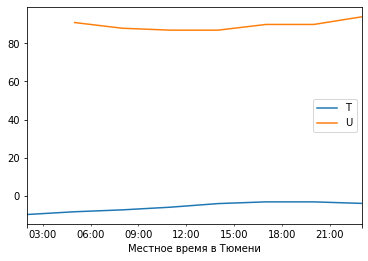

In [46]:
df_t4['2020-01-01'][['T', 'U']].plot()

In [47]:
def myf_(x):
    print(x)
    return 0

df_t4.loc['2021-01'].rolling(window=3).apply(myf_)

Местное время в Тюмени
2021-01-01 02:00:00   -30.0
2021-01-01 05:00:00   -31.3
2021-01-01 08:00:00   -31.9
dtype: float64
Местное время в Тюмени
2021-01-01 05:00:00   -31.3
2021-01-01 08:00:00   -31.9
2021-01-01 11:00:00   -30.7
dtype: float64
Местное время в Тюмени
2021-01-01 08:00:00   -31.9
2021-01-01 11:00:00   -30.7
2021-01-01 14:00:00   -27.0
dtype: float64
Местное время в Тюмени
2021-01-01 11:00:00   -30.7
2021-01-01 14:00:00   -27.0
2021-01-01 17:00:00   -29.3
dtype: float64
Местное время в Тюмени
2021-01-01 14:00:00   -27.0
2021-01-01 17:00:00   -29.3
2021-01-01 20:00:00   -31.5
dtype: float64
Местное время в Тюмени
2021-01-01 17:00:00   -29.3
2021-01-01 20:00:00   -31.5
2021-01-01 23:00:00   -31.9
dtype: float64
Местное время в Тюмени
2021-01-01 20:00:00   -31.5
2021-01-01 23:00:00   -31.9
2021-01-02 02:00:00   -31.3
dtype: float64
Местное время в Тюмени
2021-01-01 23:00:00   -31.9
2021-01-02 02:00:00   -31.3
2021-01-02 05:00:00   -31.1
dtype: float64
Местное время в Тюмени
2

dtype: float64
Местное время в Тюмени
2021-01-09 17:00:00   -14.1
2021-01-09 20:00:00   -15.4
2021-01-09 23:00:00   -16.0
dtype: float64
Местное время в Тюмени
2021-01-09 20:00:00   -15.4
2021-01-09 23:00:00   -16.0
2021-01-10 02:00:00   -16.6
dtype: float64
Местное время в Тюмени
2021-01-09 23:00:00   -16.0
2021-01-10 02:00:00   -16.6
2021-01-10 05:00:00   -19.3
dtype: float64
Местное время в Тюмени
2021-01-10 02:00:00   -16.6
2021-01-10 05:00:00   -19.3
2021-01-10 08:00:00   -20.1
dtype: float64
Местное время в Тюмени
2021-01-10 05:00:00   -19.3
2021-01-10 08:00:00   -20.1
2021-01-10 11:00:00   -21.7
dtype: float64
Местное время в Тюмени
2021-01-10 08:00:00   -20.1
2021-01-10 11:00:00   -21.7
2021-01-10 14:00:00   -20.9
dtype: float64
Местное время в Тюмени
2021-01-10 11:00:00   -21.7
2021-01-10 14:00:00   -20.9
2021-01-10 17:00:00   -20.4
dtype: float64
Местное время в Тюмени
2021-01-10 14:00:00   -20.9
2021-01-10 17:00:00   -20.4
2021-01-10 20:00:00   -20.1
dtype: float64
Местное в

Местное время в Тюмени
2021-01-19 11:00:00   -21.9
2021-01-19 14:00:00   -18.5
2021-01-19 17:00:00   -21.9
dtype: float64
Местное время в Тюмени
2021-01-19 14:00:00   -18.5
2021-01-19 17:00:00   -21.9
2021-01-19 20:00:00   -20.8
dtype: float64
Местное время в Тюмени
2021-01-19 17:00:00   -21.9
2021-01-19 20:00:00   -20.8
2021-01-19 23:00:00   -19.9
dtype: float64
Местное время в Тюмени
2021-01-19 20:00:00   -20.8
2021-01-19 23:00:00   -19.9
2021-01-20 02:00:00   -19.8
dtype: float64
Местное время в Тюмени
2021-01-19 23:00:00   -19.9
2021-01-20 02:00:00   -19.8
2021-01-20 05:00:00   -19.2
dtype: float64
Местное время в Тюмени
2021-01-20 02:00:00   -19.8
2021-01-20 05:00:00   -19.2
2021-01-20 08:00:00   -18.2
dtype: float64
Местное время в Тюмени
2021-01-20 05:00:00   -19.2
2021-01-20 08:00:00   -18.2
2021-01-20 11:00:00   -17.4
dtype: float64
Местное время в Тюмени
2021-01-20 08:00:00   -18.2
2021-01-20 11:00:00   -17.4
2021-01-20 14:00:00   -16.9
dtype: float64
Местное время в Тюмени
2

Местное время в Тюмени
2021-01-31 14:00:00    -7.2
2021-01-31 17:00:00    -8.7
2021-01-31 20:00:00   -13.7
dtype: float64
Местное время в Тюмени
2021-01-31 17:00:00    -8.7
2021-01-31 20:00:00   -13.7
2021-01-31 23:00:00   -15.1
dtype: float64
Местное время в Тюмени
2021-01-01 02:00:00    773.5
2021-01-01 05:00:00    774.3
2021-01-01 08:00:00    775.0
dtype: float64
Местное время в Тюмени
2021-01-01 05:00:00    774.3
2021-01-01 08:00:00    775.0
2021-01-01 11:00:00    775.6
dtype: float64
Местное время в Тюмени
2021-01-01 08:00:00    775.0
2021-01-01 11:00:00    775.6
2021-01-01 14:00:00    776.1
dtype: float64
Местное время в Тюмени
2021-01-01 11:00:00    775.6
2021-01-01 14:00:00    776.1
2021-01-01 17:00:00    776.5
dtype: float64
Местное время в Тюмени
2021-01-01 14:00:00    776.1
2021-01-01 17:00:00    776.5
2021-01-01 20:00:00    776.8
dtype: float64
Местное время в Тюмени
2021-01-01 17:00:00    776.5
2021-01-01 20:00:00    776.8
2021-01-01 23:00:00    777.0
dtype: float64
Местно

dtype: float64
Местное время в Тюмени
2021-01-09 17:00:00    759.1
2021-01-09 20:00:00    758.2
2021-01-09 23:00:00    758.3
dtype: float64
Местное время в Тюмени
2021-01-09 20:00:00    758.2
2021-01-09 23:00:00    758.3
2021-01-10 02:00:00    759.1
dtype: float64
Местное время в Тюмени
2021-01-09 23:00:00    758.3
2021-01-10 02:00:00    759.1
2021-01-10 05:00:00    760.3
dtype: float64
Местное время в Тюмени
2021-01-10 02:00:00    759.1
2021-01-10 05:00:00    760.3
2021-01-10 08:00:00    760.5
dtype: float64
Местное время в Тюмени
2021-01-10 05:00:00    760.3
2021-01-10 08:00:00    760.5
2021-01-10 11:00:00    760.6
dtype: float64
Местное время в Тюмени
2021-01-10 08:00:00    760.5
2021-01-10 11:00:00    760.6
2021-01-10 14:00:00    760.1
dtype: float64
Местное время в Тюмени
2021-01-10 11:00:00    760.6
2021-01-10 14:00:00    760.1
2021-01-10 17:00:00    758.6
dtype: float64
Местное время в Тюмени
2021-01-10 14:00:00    760.1
2021-01-10 17:00:00    758.6
2021-01-10 20:00:00    757.3


dtype: float64
Местное время в Тюмени
2021-01-21 05:00:00    746.2
2021-01-21 08:00:00    746.5
2021-01-21 11:00:00    747.0
dtype: float64
Местное время в Тюмени
2021-01-21 08:00:00    746.5
2021-01-21 11:00:00    747.0
2021-01-21 14:00:00    747.1
dtype: float64
Местное время в Тюмени
2021-01-21 11:00:00    747.0
2021-01-21 14:00:00    747.1
2021-01-21 17:00:00    747.2
dtype: float64
Местное время в Тюмени
2021-01-21 14:00:00    747.1
2021-01-21 17:00:00    747.2
2021-01-21 20:00:00    747.7
dtype: float64
Местное время в Тюмени
2021-01-21 17:00:00    747.2
2021-01-21 20:00:00    747.7
2021-01-21 23:00:00    747.9
dtype: float64
Местное время в Тюмени
2021-01-21 20:00:00    747.7
2021-01-21 23:00:00    747.9
2021-01-22 02:00:00    748.6
dtype: float64
Местное время в Тюмени
2021-01-21 23:00:00    747.9
2021-01-22 02:00:00    748.6
2021-01-22 05:00:00    749.2
dtype: float64
Местное время в Тюмени
2021-01-22 02:00:00    748.6
2021-01-22 05:00:00    749.2
2021-01-22 08:00:00    750.1


Местное время в Тюмени
2021-01-02 08:00:00    789.9
2021-01-02 11:00:00    790.1
2021-01-02 14:00:00    790.5
dtype: float64
Местное время в Тюмени
2021-01-02 11:00:00    790.1
2021-01-02 14:00:00    790.5
2021-01-02 17:00:00    790.8
dtype: float64
Местное время в Тюмени
2021-01-02 14:00:00    790.5
2021-01-02 17:00:00    790.8
2021-01-02 20:00:00    790.9
dtype: float64
Местное время в Тюмени
2021-01-02 17:00:00    790.8
2021-01-02 20:00:00    790.9
2021-01-02 23:00:00    791.2
dtype: float64
Местное время в Тюмени
2021-01-02 20:00:00    790.9
2021-01-02 23:00:00    791.2
2021-01-03 02:00:00    791.3
dtype: float64
Местное время в Тюмени
2021-01-02 23:00:00    791.2
2021-01-03 02:00:00    791.3
2021-01-03 05:00:00    791.4
dtype: float64
Местное время в Тюмени
2021-01-03 02:00:00    791.3
2021-01-03 05:00:00    791.4
2021-01-03 08:00:00    791.3
dtype: float64
Местное время в Тюмени
2021-01-03 05:00:00    791.4
2021-01-03 08:00:00    791.3
2021-01-03 11:00:00    791.2
dtype: float64


dtype: float64
Местное время в Тюмени
2021-01-14 05:00:00    782.9
2021-01-14 08:00:00    782.5
2021-01-14 11:00:00    783.0
dtype: float64
Местное время в Тюмени
2021-01-14 08:00:00    782.5
2021-01-14 11:00:00    783.0
2021-01-14 14:00:00    782.8
dtype: float64
Местное время в Тюмени
2021-01-14 11:00:00    783.0
2021-01-14 14:00:00    782.8
2021-01-14 17:00:00    782.5
dtype: float64
Местное время в Тюмени
2021-01-14 14:00:00    782.8
2021-01-14 17:00:00    782.5
2021-01-14 20:00:00    782.5
dtype: float64
Местное время в Тюмени
2021-01-14 17:00:00    782.5
2021-01-14 20:00:00    782.5
2021-01-14 23:00:00    781.6
dtype: float64
Местное время в Тюмени
2021-01-14 20:00:00    782.5
2021-01-14 23:00:00    781.6
2021-01-15 02:00:00    780.0
dtype: float64
Местное время в Тюмени
2021-01-14 23:00:00    781.6
2021-01-15 02:00:00    780.0
2021-01-15 05:00:00    778.4
dtype: float64
Местное время в Тюмени
2021-01-15 02:00:00    780.0
2021-01-15 05:00:00    778.4
2021-01-15 08:00:00    775.9


dtype: float64
Местное время в Тюмени
2021-01-26 11:00:00    767.4
2021-01-26 14:00:00    767.1
2021-01-26 17:00:00    767.0
dtype: float64
Местное время в Тюмени
2021-01-26 14:00:00    767.1
2021-01-26 17:00:00    767.0
2021-01-26 20:00:00    766.8
dtype: float64
Местное время в Тюмени
2021-01-26 17:00:00    767.0
2021-01-26 20:00:00    766.8
2021-01-26 23:00:00    766.4
dtype: float64
Местное время в Тюмени
2021-01-26 20:00:00    766.8
2021-01-26 23:00:00    766.4
2021-01-27 02:00:00    766.9
dtype: float64
Местное время в Тюмени
2021-01-26 23:00:00    766.4
2021-01-27 02:00:00    766.9
2021-01-27 05:00:00    767.6
dtype: float64
Местное время в Тюмени
2021-01-27 02:00:00    766.9
2021-01-27 05:00:00    767.6
2021-01-27 08:00:00    767.9
dtype: float64
Местное время в Тюмени
2021-01-27 05:00:00    767.6
2021-01-27 08:00:00    767.9
2021-01-27 11:00:00    768.5
dtype: float64
Местное время в Тюмени
2021-01-27 08:00:00    767.9
2021-01-27 11:00:00    768.5
2021-01-27 14:00:00    768.8


dtype: float64
Местное время в Тюмени
2021-01-07 02:00:00    0.0
2021-01-07 05:00:00   -0.5
2021-01-07 08:00:00   -0.4
dtype: float64
Местное время в Тюмени
2021-01-07 05:00:00   -0.5
2021-01-07 08:00:00   -0.4
2021-01-07 11:00:00    0.0
dtype: float64
Местное время в Тюмени
2021-01-07 08:00:00   -0.4
2021-01-07 11:00:00    0.0
2021-01-07 14:00:00   -1.1
dtype: float64
Местное время в Тюмени
2021-01-07 11:00:00    0.0
2021-01-07 14:00:00   -1.1
2021-01-07 17:00:00   -0.9
dtype: float64
Местное время в Тюмени
2021-01-07 14:00:00   -1.1
2021-01-07 17:00:00   -0.9
2021-01-07 20:00:00   -1.2
dtype: float64
Местное время в Тюмени
2021-01-07 17:00:00   -0.9
2021-01-07 20:00:00   -1.2
2021-01-07 23:00:00   -1.1
dtype: float64
Местное время в Тюмени
2021-01-07 20:00:00   -1.2
2021-01-07 23:00:00   -1.1
2021-01-08 02:00:00   -1.2
dtype: float64
Местное время в Тюмени
2021-01-07 23:00:00   -1.1
2021-01-08 02:00:00   -1.2
2021-01-08 05:00:00   -1.3
dtype: float64
Местное время в Тюмени
2021-01-08

dtype: float64
Местное время в Тюмени
2021-01-18 11:00:00    1.7
2021-01-18 14:00:00    1.3
2021-01-18 17:00:00    0.5
dtype: float64
Местное время в Тюмени
2021-01-18 14:00:00    1.3
2021-01-18 17:00:00    0.5
2021-01-18 20:00:00    0.2
dtype: float64
Местное время в Тюмени
2021-01-18 17:00:00    0.5
2021-01-18 20:00:00    0.2
2021-01-18 23:00:00    0.7
dtype: float64
Местное время в Тюмени
2021-01-18 20:00:00    0.2
2021-01-18 23:00:00    0.7
2021-01-19 02:00:00    1.5
dtype: float64
Местное время в Тюмени
2021-01-18 23:00:00    0.7
2021-01-19 02:00:00    1.5
2021-01-19 05:00:00    0.9
dtype: float64
Местное время в Тюмени
2021-01-19 02:00:00    1.5
2021-01-19 05:00:00    0.9
2021-01-19 08:00:00    0.5
dtype: float64
Местное время в Тюмени
2021-01-19 05:00:00    0.9
2021-01-19 08:00:00    0.5
2021-01-19 11:00:00    1.1
dtype: float64
Местное время в Тюмени
2021-01-19 08:00:00    0.5
2021-01-19 11:00:00    1.1
2021-01-19 14:00:00    1.0
dtype: float64
Местное время в Тюмени
2021-01-19

dtype: float64
Местное время в Тюмени
2021-01-28 17:00:00   -0.7
2021-01-28 20:00:00   -0.1
2021-01-28 23:00:00    0.4
dtype: float64
Местное время в Тюмени
2021-01-28 20:00:00   -0.1
2021-01-28 23:00:00    0.4
2021-01-29 02:00:00    0.6
dtype: float64
Местное время в Тюмени
2021-01-28 23:00:00    0.4
2021-01-29 02:00:00    0.6
2021-01-29 05:00:00    0.4
dtype: float64
Местное время в Тюмени
2021-01-29 02:00:00    0.6
2021-01-29 05:00:00    0.4
2021-01-29 08:00:00    0.3
dtype: float64
Местное время в Тюмени
2021-01-29 05:00:00    0.4
2021-01-29 08:00:00    0.3
2021-01-29 11:00:00    0.9
dtype: float64
Местное время в Тюмени
2021-01-29 08:00:00    0.3
2021-01-29 11:00:00    0.9
2021-01-29 14:00:00    0.6
dtype: float64
Местное время в Тюмени
2021-01-29 11:00:00    0.9
2021-01-29 14:00:00    0.6
2021-01-29 17:00:00    0.7
dtype: float64
Местное время в Тюмени
2021-01-29 14:00:00    0.6
2021-01-29 17:00:00    0.7
2021-01-29 20:00:00    0.4
dtype: float64
Местное время в Тюмени
2021-01-29

dtype: float64
Местное время в Тюмени
2021-01-07 23:00:00    73.0
2021-01-08 02:00:00    73.0
2021-01-08 05:00:00    73.0
dtype: float64
Местное время в Тюмени
2021-01-08 02:00:00    73.0
2021-01-08 05:00:00    73.0
2021-01-08 08:00:00    71.0
dtype: float64
Местное время в Тюмени
2021-01-08 05:00:00    73.0
2021-01-08 08:00:00    71.0
2021-01-08 11:00:00    69.0
dtype: float64
Местное время в Тюмени
2021-01-08 08:00:00    71.0
2021-01-08 11:00:00    69.0
2021-01-08 14:00:00    62.0
dtype: float64
Местное время в Тюмени
2021-01-08 11:00:00    69.0
2021-01-08 14:00:00    62.0
2021-01-08 17:00:00    60.0
dtype: float64
Местное время в Тюмени
2021-01-08 14:00:00    62.0
2021-01-08 17:00:00    60.0
2021-01-08 20:00:00    71.0
dtype: float64
Местное время в Тюмени
2021-01-08 17:00:00    60.0
2021-01-08 20:00:00    71.0
2021-01-08 23:00:00    74.0
dtype: float64
Местное время в Тюмени
2021-01-08 20:00:00    71.0
2021-01-08 23:00:00    74.0
2021-01-09 02:00:00    73.0
dtype: float64
Местное в

dtype: float64
Местное время в Тюмени
2021-01-18 17:00:00    70.0
2021-01-18 20:00:00    77.0
2021-01-18 23:00:00    79.0
dtype: float64
Местное время в Тюмени
2021-01-18 20:00:00    77.0
2021-01-18 23:00:00    79.0
2021-01-19 02:00:00    83.0
dtype: float64
Местное время в Тюмени
2021-01-18 23:00:00    79.0
2021-01-19 02:00:00    83.0
2021-01-19 05:00:00    83.0
dtype: float64
Местное время в Тюмени
2021-01-19 02:00:00    83.0
2021-01-19 05:00:00    83.0
2021-01-19 08:00:00    78.0
dtype: float64
Местное время в Тюмени
2021-01-19 05:00:00    83.0
2021-01-19 08:00:00    78.0
2021-01-19 11:00:00    80.0
dtype: float64
Местное время в Тюмени
2021-01-19 08:00:00    78.0
2021-01-19 11:00:00    80.0
2021-01-19 14:00:00    76.0
dtype: float64
Местное время в Тюмени
2021-01-19 11:00:00    80.0
2021-01-19 14:00:00    76.0
2021-01-19 17:00:00    82.0
dtype: float64
Местное время в Тюмени
2021-01-19 14:00:00    76.0
2021-01-19 17:00:00    82.0
2021-01-19 20:00:00    82.0
dtype: float64
Местное в

Местное время в Тюмени
2021-01-03 14:00:00    3.0
2021-01-03 17:00:00    3.0
2021-01-03 20:00:00    4.0
dtype: float64
Местное время в Тюмени
2021-01-03 17:00:00    3.0
2021-01-03 20:00:00    4.0
2021-01-03 23:00:00    1.0
dtype: float64
Местное время в Тюмени
2021-01-03 20:00:00    4.0
2021-01-03 23:00:00    1.0
2021-01-04 02:00:00    4.0
dtype: float64
Местное время в Тюмени
2021-01-03 23:00:00    1.0
2021-01-04 02:00:00    4.0
2021-01-04 05:00:00    4.0
dtype: float64
Местное время в Тюмени
2021-01-04 02:00:00    4.0
2021-01-04 05:00:00    4.0
2021-01-04 08:00:00    4.0
dtype: float64
Местное время в Тюмени
2021-01-04 05:00:00    4.0
2021-01-04 08:00:00    4.0
2021-01-04 11:00:00    4.0
dtype: float64
Местное время в Тюмени
2021-01-04 08:00:00    4.0
2021-01-04 11:00:00    4.0
2021-01-04 14:00:00    3.0
dtype: float64
Местное время в Тюмени
2021-01-04 11:00:00    4.0
2021-01-04 14:00:00    3.0
2021-01-04 17:00:00    3.0
dtype: float64
Местное время в Тюмени
2021-01-04 14:00:00    3.

dtype: float64
Местное время в Тюмени
2021-01-13 20:00:00    0.0
2021-01-13 23:00:00    0.0
2021-01-14 02:00:00    0.0
dtype: float64
Местное время в Тюмени
2021-01-13 23:00:00    0.0
2021-01-14 02:00:00    0.0
2021-01-14 05:00:00    0.0
dtype: float64
Местное время в Тюмени
2021-01-14 02:00:00    0.0
2021-01-14 05:00:00    0.0
2021-01-14 08:00:00    4.0
dtype: float64
Местное время в Тюмени
2021-01-14 05:00:00    0.0
2021-01-14 08:00:00    4.0
2021-01-14 11:00:00    4.0
dtype: float64
Местное время в Тюмени
2021-01-14 08:00:00    4.0
2021-01-14 11:00:00    4.0
2021-01-14 14:00:00    4.0
dtype: float64
Местное время в Тюмени
2021-01-14 11:00:00    4.0
2021-01-14 14:00:00    4.0
2021-01-14 17:00:00    4.0
dtype: float64
Местное время в Тюмени
2021-01-14 14:00:00    4.0
2021-01-14 17:00:00    4.0
2021-01-14 20:00:00    4.0
dtype: float64
Местное время в Тюмени
2021-01-14 17:00:00    4.0
2021-01-14 20:00:00    4.0
2021-01-14 23:00:00    4.0
dtype: float64
Местное время в Тюмени
2021-01-14

dtype: float64
Местное время в Тюмени
2021-01-24 20:00:00    3.0
2021-01-24 23:00:00    4.0
2021-01-25 02:00:00    3.0
dtype: float64
Местное время в Тюмени
2021-01-24 23:00:00    4.0
2021-01-25 02:00:00    3.0
2021-01-25 05:00:00    4.0
dtype: float64
Местное время в Тюмени
2021-01-25 02:00:00    3.0
2021-01-25 05:00:00    4.0
2021-01-25 08:00:00    0.0
dtype: float64
Местное время в Тюмени
2021-01-25 05:00:00    4.0
2021-01-25 08:00:00    0.0
2021-01-25 11:00:00    0.0
dtype: float64
Местное время в Тюмени
2021-01-25 08:00:00    0.0
2021-01-25 11:00:00    0.0
2021-01-25 14:00:00    0.0
dtype: float64
Местное время в Тюмени
2021-01-25 11:00:00    0.0
2021-01-25 14:00:00    0.0
2021-01-25 17:00:00    4.0
dtype: float64
Местное время в Тюмени
2021-01-25 14:00:00    0.0
2021-01-25 17:00:00    4.0
2021-01-25 20:00:00    4.0
dtype: float64
Местное время в Тюмени
2021-01-25 17:00:00    4.0
2021-01-25 20:00:00    4.0
2021-01-25 23:00:00    4.0
dtype: float64
Местное время в Тюмени
2021-01-25

dtype: float64
Местное время в Тюмени
2021-01-05 11:00:00    2.0
2021-01-05 14:00:00    3.0
2021-01-05 17:00:00    3.0
dtype: float64
Местное время в Тюмени
2021-01-05 14:00:00    3.0
2021-01-05 17:00:00    3.0
2021-01-05 20:00:00    2.0
dtype: float64
Местное время в Тюмени
2021-01-05 17:00:00    3.0
2021-01-05 20:00:00    2.0
2021-01-05 23:00:00    2.0
dtype: float64
Местное время в Тюмени
2021-01-05 20:00:00    2.0
2021-01-05 23:00:00    2.0
2021-01-06 02:00:00    2.0
dtype: float64
Местное время в Тюмени
2021-01-05 23:00:00    2.0
2021-01-06 02:00:00    2.0
2021-01-06 05:00:00    2.0
dtype: float64
Местное время в Тюмени
2021-01-06 02:00:00    2.0
2021-01-06 05:00:00    2.0
2021-01-06 08:00:00    3.0
dtype: float64
Местное время в Тюмени
2021-01-06 05:00:00    2.0
2021-01-06 08:00:00    3.0
2021-01-06 11:00:00    2.0
dtype: float64
Местное время в Тюмени
2021-01-06 08:00:00    3.0
2021-01-06 11:00:00    2.0
2021-01-06 14:00:00    2.0
dtype: float64
Местное время в Тюмени
2021-01-06

dtype: float64
Местное время в Тюмени
2021-01-17 14:00:00    3.0
2021-01-17 17:00:00    3.0
2021-01-17 20:00:00    3.0
dtype: float64
Местное время в Тюмени
2021-01-17 17:00:00    3.0
2021-01-17 20:00:00    3.0
2021-01-17 23:00:00    4.0
dtype: float64
Местное время в Тюмени
2021-01-17 20:00:00    3.0
2021-01-17 23:00:00    4.0
2021-01-18 02:00:00    4.0
dtype: float64
Местное время в Тюмени
2021-01-17 23:00:00    4.0
2021-01-18 02:00:00    4.0
2021-01-18 05:00:00    3.0
dtype: float64
Местное время в Тюмени
2021-01-18 02:00:00    4.0
2021-01-18 05:00:00    3.0
2021-01-18 08:00:00    2.0
dtype: float64
Местное время в Тюмени
2021-01-18 05:00:00    3.0
2021-01-18 08:00:00    2.0
2021-01-18 11:00:00    3.0
dtype: float64
Местное время в Тюмени
2021-01-18 08:00:00    2.0
2021-01-18 11:00:00    3.0
2021-01-18 14:00:00    3.0
dtype: float64
Местное время в Тюмени
2021-01-18 11:00:00    3.0
2021-01-18 14:00:00    3.0
2021-01-18 17:00:00    2.0
dtype: float64
Местное время в Тюмени
2021-01-18

dtype: float64
Местное время в Тюмени
2021-01-29 11:00:00    2.0
2021-01-29 14:00:00    2.0
2021-01-29 17:00:00    1.0
dtype: float64
Местное время в Тюмени
2021-01-29 14:00:00    2.0
2021-01-29 17:00:00    1.0
2021-01-29 20:00:00    2.0
dtype: float64
Местное время в Тюмени
2021-01-29 17:00:00    1.0
2021-01-29 20:00:00    2.0
2021-01-29 23:00:00    2.0
dtype: float64
Местное время в Тюмени
2021-01-29 20:00:00    2.0
2021-01-29 23:00:00    2.0
2021-01-30 02:00:00    2.0
dtype: float64
Местное время в Тюмени
2021-01-29 23:00:00    2.0
2021-01-30 02:00:00    2.0
2021-01-30 05:00:00    2.0
dtype: float64
Местное время в Тюмени
2021-01-30 02:00:00    2.0
2021-01-30 05:00:00    2.0
2021-01-30 08:00:00    2.0
dtype: float64
Местное время в Тюмени
2021-01-30 05:00:00    2.0
2021-01-30 08:00:00    2.0
2021-01-30 11:00:00    2.0
dtype: float64
Местное время в Тюмени
2021-01-30 08:00:00    2.0
2021-01-30 11:00:00    2.0
2021-01-30 14:00:00    3.0
dtype: float64
Местное время в Тюмени
2021-01-30

dtype: float64
Местное время в Тюмени
2021-01-09 23:00:00    100.0
2021-01-10 02:00:00    100.0
2021-01-10 05:00:00    100.0
dtype: float64
Местное время в Тюмени
2021-01-10 02:00:00    100.0
2021-01-10 05:00:00    100.0
2021-01-10 08:00:00      0.0
dtype: float64
Местное время в Тюмени
2021-01-10 05:00:00    100.0
2021-01-10 08:00:00      0.0
2021-01-10 11:00:00     60.0
dtype: float64
Местное время в Тюмени
2021-01-10 08:00:00      0.0
2021-01-10 11:00:00     60.0
2021-01-10 14:00:00    100.0
dtype: float64
Местное время в Тюмени
2021-01-10 11:00:00     60.0
2021-01-10 14:00:00    100.0
2021-01-10 17:00:00    100.0
dtype: float64
Местное время в Тюмени
2021-01-10 14:00:00    100.0
2021-01-10 17:00:00    100.0
2021-01-10 20:00:00    100.0
dtype: float64
Местное время в Тюмени
2021-01-10 17:00:00    100.0
2021-01-10 20:00:00    100.0
2021-01-10 23:00:00    100.0
dtype: float64
Местное время в Тюмени
2021-01-10 20:00:00    100.0
2021-01-10 23:00:00    100.0
2021-01-11 02:00:00    100.0


dtype: float64
Местное время в Тюмени
2021-01-22 05:00:00     0.0
2021-01-22 08:00:00    90.0
2021-01-22 11:00:00     0.0
dtype: float64
Местное время в Тюмени
2021-01-22 08:00:00     90.0
2021-01-22 11:00:00      0.0
2021-01-22 14:00:00    100.0
dtype: float64
Местное время в Тюмени
2021-01-22 11:00:00      0.0
2021-01-22 14:00:00    100.0
2021-01-22 17:00:00     75.0
dtype: float64
Местное время в Тюмени
2021-01-22 14:00:00    100.0
2021-01-22 17:00:00     75.0
2021-01-22 20:00:00    100.0
dtype: float64
Местное время в Тюмени
2021-01-22 17:00:00     75.0
2021-01-22 20:00:00    100.0
2021-01-22 23:00:00    100.0
dtype: float64
Местное время в Тюмени
2021-01-22 20:00:00    100.0
2021-01-22 23:00:00    100.0
2021-01-23 02:00:00      0.0
dtype: float64
Местное время в Тюмени
2021-01-22 23:00:00    100.0
2021-01-23 02:00:00      0.0
2021-01-23 05:00:00      0.0
dtype: float64
Местное время в Тюмени
2021-01-23 02:00:00     0.0
2021-01-23 05:00:00     0.0
2021-01-23 08:00:00    25.0
dtype:

dtype: float64
Местное время в Тюмени
2021-01-04 02:00:00   -24.1
2021-01-04 05:00:00   -24.0
2021-01-04 08:00:00   -24.3
dtype: float64
Местное время в Тюмени
2021-01-04 05:00:00   -24.0
2021-01-04 08:00:00   -24.3
2021-01-04 11:00:00   -24.2
dtype: float64
Местное время в Тюмени
2021-01-04 08:00:00   -24.3
2021-01-04 11:00:00   -24.2
2021-01-04 14:00:00   -22.8
dtype: float64
Местное время в Тюмени
2021-01-04 11:00:00   -24.2
2021-01-04 14:00:00   -22.8
2021-01-04 17:00:00   -24.3
dtype: float64
Местное время в Тюмени
2021-01-04 14:00:00   -22.8
2021-01-04 17:00:00   -24.3
2021-01-04 20:00:00   -25.5
dtype: float64
Местное время в Тюмени
2021-01-04 17:00:00   -24.3
2021-01-04 20:00:00   -25.5
2021-01-04 23:00:00   -26.2
dtype: float64
Местное время в Тюмени
2021-01-04 20:00:00   -25.5
2021-01-04 23:00:00   -26.2
2021-01-05 02:00:00   -26.3
dtype: float64
Местное время в Тюмени
2021-01-04 23:00:00   -26.2
2021-01-05 02:00:00   -26.3
2021-01-05 05:00:00   -26.9
dtype: float64
Местное в

dtype: float64
Местное время в Тюмени
2021-01-16 08:00:00   -14.7
2021-01-16 11:00:00   -14.2
2021-01-16 14:00:00   -13.6
dtype: float64
Местное время в Тюмени
2021-01-16 11:00:00   -14.2
2021-01-16 14:00:00   -13.6
2021-01-16 17:00:00   -13.3
dtype: float64
Местное время в Тюмени
2021-01-16 14:00:00   -13.6
2021-01-16 17:00:00   -13.3
2021-01-16 20:00:00   -12.8
dtype: float64
Местное время в Тюмени
2021-01-16 17:00:00   -13.3
2021-01-16 20:00:00   -12.8
2021-01-16 23:00:00   -11.1
dtype: float64
Местное время в Тюмени
2021-01-16 20:00:00   -12.8
2021-01-16 23:00:00   -11.1
2021-01-17 02:00:00    -9.8
dtype: float64
Местное время в Тюмени
2021-01-16 23:00:00   -11.1
2021-01-17 02:00:00    -9.8
2021-01-17 05:00:00   -10.4
dtype: float64
Местное время в Тюмени
2021-01-17 02:00:00    -9.8
2021-01-17 05:00:00   -10.4
2021-01-17 08:00:00   -13.0
dtype: float64
Местное время в Тюмени
2021-01-17 05:00:00   -10.4
2021-01-17 08:00:00   -13.0
2021-01-17 11:00:00   -12.9
dtype: float64
Местное в

dtype: float64
Местное время в Тюмени
2021-01-27 20:00:00   -6.0
2021-01-27 23:00:00   -5.5
2021-01-28 02:00:00   -4.7
dtype: float64
Местное время в Тюмени
2021-01-27 23:00:00   -5.5
2021-01-28 02:00:00   -4.7
2021-01-28 05:00:00   -6.4
dtype: float64
Местное время в Тюмени
2021-01-28 02:00:00   -4.7
2021-01-28 05:00:00   -6.4
2021-01-28 08:00:00   -6.0
dtype: float64
Местное время в Тюмени
2021-01-28 05:00:00   -6.4
2021-01-28 08:00:00   -6.0
2021-01-28 11:00:00   -5.6
dtype: float64
Местное время в Тюмени
2021-01-28 08:00:00   -6.0
2021-01-28 11:00:00   -5.6
2021-01-28 14:00:00   -5.8
dtype: float64
Местное время в Тюмени
2021-01-28 11:00:00   -5.6
2021-01-28 14:00:00   -5.8
2021-01-28 17:00:00   -6.7
dtype: float64
Местное время в Тюмени
2021-01-28 14:00:00   -5.8
2021-01-28 17:00:00   -6.7
2021-01-28 20:00:00   -7.6
dtype: float64
Местное время в Тюмени
2021-01-28 17:00:00   -6.7
2021-01-28 20:00:00   -7.6
2021-01-28 23:00:00   -8.3
dtype: float64
Местное время в Тюмени
2021-01-28

dtype: float64
Местное время в Тюмени
2021-01-09 17:00:00   -15.4
2021-01-09 20:00:00   -16.0
2021-01-09 23:00:00   -16.6
dtype: float64
Местное время в Тюмени
2021-01-09 20:00:00   -16.0
2021-01-09 23:00:00   -16.6
2021-01-10 02:00:00   -19.3
dtype: float64
Местное время в Тюмени
2021-01-09 23:00:00   -16.6
2021-01-10 02:00:00   -19.3
2021-01-10 05:00:00   -20.1
dtype: float64
Местное время в Тюмени
2021-01-10 02:00:00   -19.3
2021-01-10 05:00:00   -20.1
2021-01-10 08:00:00   -21.7
dtype: float64
Местное время в Тюмени
2021-01-10 05:00:00   -20.1
2021-01-10 08:00:00   -21.7
2021-01-10 11:00:00   -20.9
dtype: float64
Местное время в Тюмени
2021-01-10 08:00:00   -21.7
2021-01-10 11:00:00   -20.9
2021-01-10 14:00:00   -20.4
dtype: float64
Местное время в Тюмени
2021-01-10 11:00:00   -20.9
2021-01-10 14:00:00   -20.4
2021-01-10 17:00:00   -20.1
dtype: float64
Местное время в Тюмени
2021-01-10 14:00:00   -20.4
2021-01-10 17:00:00   -20.1
2021-01-10 20:00:00   -20.0
dtype: float64
Местное в

dtype: float64
Местное время в Тюмени
2021-01-19 02:00:00   -22.5
2021-01-19 05:00:00   -24.8
2021-01-19 08:00:00   -21.9
dtype: float64
Местное время в Тюмени
2021-01-19 05:00:00   -24.8
2021-01-19 08:00:00   -21.9
2021-01-19 11:00:00   -18.5
dtype: float64
Местное время в Тюмени
2021-01-19 08:00:00   -21.9
2021-01-19 11:00:00   -18.5
2021-01-19 14:00:00   -21.9
dtype: float64
Местное время в Тюмени
2021-01-19 11:00:00   -18.5
2021-01-19 14:00:00   -21.9
2021-01-19 17:00:00   -20.8
dtype: float64
Местное время в Тюмени
2021-01-19 14:00:00   -21.9
2021-01-19 17:00:00   -20.8
2021-01-19 20:00:00   -19.9
dtype: float64
Местное время в Тюмени
2021-01-19 17:00:00   -20.8
2021-01-19 20:00:00   -19.9
2021-01-19 23:00:00   -19.8
dtype: float64
Местное время в Тюмени
2021-01-19 20:00:00   -19.9
2021-01-19 23:00:00   -19.8
2021-01-20 02:00:00   -19.2
dtype: float64
Местное время в Тюмени
2021-01-19 23:00:00   -19.8
2021-01-20 02:00:00   -19.2
2021-01-20 05:00:00   -18.2
dtype: float64
Местное в

dtype: float64
Местное время в Тюмени
2021-01-29 05:00:00   -6.8
2021-01-29 08:00:00   -7.2
2021-01-29 11:00:00   -5.3
dtype: float64
Местное время в Тюмени
2021-01-29 08:00:00   -7.2
2021-01-29 11:00:00   -5.3
2021-01-29 14:00:00   -6.2
dtype: float64
Местное время в Тюмени
2021-01-29 11:00:00   -5.3
2021-01-29 14:00:00   -6.2
2021-01-29 17:00:00   -9.2
dtype: float64
Местное время в Тюмени
2021-01-29 14:00:00    -6.2
2021-01-29 17:00:00    -9.2
2021-01-29 20:00:00   -12.1
dtype: float64
Местное время в Тюмени
2021-01-29 17:00:00    -9.2
2021-01-29 20:00:00   -12.1
2021-01-29 23:00:00   -13.4
dtype: float64
Местное время в Тюмени
2021-01-29 20:00:00   -12.1
2021-01-29 23:00:00   -13.4
2021-01-30 02:00:00   -14.7
dtype: float64
Местное время в Тюмени
2021-01-29 23:00:00   -13.4
2021-01-30 02:00:00   -14.7
2021-01-30 05:00:00   -14.6
dtype: float64
Местное время в Тюмени
2021-01-30 02:00:00   -14.7
2021-01-30 05:00:00   -14.6
2021-01-30 08:00:00   -12.9
dtype: float64
Местное время в Тю

Местное время в Тюмени
2021-01-10 14:00:00   -20.1
2021-01-10 17:00:00   -20.0
2021-01-10 20:00:00   -20.2
dtype: float64
Местное время в Тюмени
2021-01-10 17:00:00   -20.0
2021-01-10 20:00:00   -20.2
2021-01-10 23:00:00   -20.6
dtype: float64
Местное время в Тюмени
2021-01-10 20:00:00   -20.2
2021-01-10 23:00:00   -20.6
2021-01-11 02:00:00   -20.1
dtype: float64
Местное время в Тюмени
2021-01-10 23:00:00   -20.6
2021-01-11 02:00:00   -20.1
2021-01-11 05:00:00   -20.3
dtype: float64
Местное время в Тюмени
2021-01-11 02:00:00   -20.1
2021-01-11 05:00:00   -20.3
2021-01-11 08:00:00   -17.8
dtype: float64
Местное время в Тюмени
2021-01-11 05:00:00   -20.3
2021-01-11 08:00:00   -17.8
2021-01-11 11:00:00   -18.2
dtype: float64
Местное время в Тюмени
2021-01-11 08:00:00   -17.8
2021-01-11 11:00:00   -18.2
2021-01-11 14:00:00   -20.4
dtype: float64
Местное время в Тюмени
2021-01-11 11:00:00   -18.2
2021-01-11 14:00:00   -20.4
2021-01-11 17:00:00   -23.3
dtype: float64
Местное время в Тюмени
2

dtype: float64
Местное время в Тюмени
2021-01-22 05:00:00   -25.8
2021-01-22 08:00:00   -24.6
2021-01-22 11:00:00   -25.5
dtype: float64
Местное время в Тюмени
2021-01-22 08:00:00   -24.6
2021-01-22 11:00:00   -25.5
2021-01-22 14:00:00   -25.8
dtype: float64
Местное время в Тюмени
2021-01-22 11:00:00   -25.5
2021-01-22 14:00:00   -25.8
2021-01-22 17:00:00   -27.0
dtype: float64
Местное время в Тюмени
2021-01-22 14:00:00   -25.8
2021-01-22 17:00:00   -27.0
2021-01-22 20:00:00   -29.8
dtype: float64
Местное время в Тюмени
2021-01-22 17:00:00   -27.0
2021-01-22 20:00:00   -29.8
2021-01-22 23:00:00   -31.7
dtype: float64
Местное время в Тюмени
2021-01-22 20:00:00   -29.8
2021-01-22 23:00:00   -31.7
2021-01-23 02:00:00   -33.4
dtype: float64
Местное время в Тюмени
2021-01-22 23:00:00   -31.7
2021-01-23 02:00:00   -33.4
2021-01-23 05:00:00   -33.5
dtype: float64
Местное время в Тюмени
2021-01-23 02:00:00   -33.4
2021-01-23 05:00:00   -33.5
2021-01-23 08:00:00   -32.0
dtype: float64
Местное в

Местное время в Тюмени
2021-01-03 08:00:00   -23.3
2021-01-03 11:00:00   -21.6
2021-01-03 14:00:00    -7.1
dtype: float64
Местное время в Тюмени
2021-01-03 11:00:00   -21.6
2021-01-03 14:00:00    -7.1
2021-01-03 17:00:00   -21.1
dtype: float64
Местное время в Тюмени
2021-01-03 14:00:00    -7.1
2021-01-03 17:00:00   -21.1
2021-01-03 20:00:00   -21.0
dtype: float64
Местное время в Тюмени
2021-01-03 17:00:00   -21.1
2021-01-03 20:00:00   -21.0
2021-01-03 23:00:00   -21.2
dtype: float64
Местное время в Тюмени
2021-01-03 20:00:00   -21.0
2021-01-03 23:00:00   -21.2
2021-01-04 02:00:00   -21.1
dtype: float64
Местное время в Тюмени
2021-01-03 23:00:00   -21.2
2021-01-04 02:00:00   -21.1
2021-01-04 05:00:00   -19.6
dtype: float64
Местное время в Тюмени
2021-01-04 02:00:00   -21.1
2021-01-04 05:00:00   -19.6
2021-01-04 08:00:00   -20.6
dtype: float64
Местное время в Тюмени
2021-01-04 05:00:00   -19.6
2021-01-04 08:00:00   -20.6
2021-01-04 11:00:00   -21.7
dtype: float64
Местное время в Тюмени
2

dtype: float64
Местное время в Тюмени
2021-01-14 02:00:00   -28.0
2021-01-14 05:00:00   -22.1
2021-01-14 08:00:00   -23.7
dtype: float64
Местное время в Тюмени
2021-01-14 05:00:00   -22.1
2021-01-14 08:00:00   -23.7
2021-01-14 11:00:00   -27.5
dtype: float64
Местное время в Тюмени
2021-01-14 08:00:00   -23.7
2021-01-14 11:00:00   -27.5
2021-01-14 14:00:00   -27.3
dtype: float64
Местное время в Тюмени
2021-01-14 11:00:00   -27.5
2021-01-14 14:00:00   -27.3
2021-01-14 17:00:00   -27.9
dtype: float64
Местное время в Тюмени
2021-01-14 14:00:00   -27.3
2021-01-14 17:00:00   -27.9
2021-01-14 20:00:00   -25.5
dtype: float64
Местное время в Тюмени
2021-01-14 17:00:00   -27.9
2021-01-14 20:00:00   -25.5
2021-01-14 23:00:00   -22.7
dtype: float64
Местное время в Тюмени
2021-01-14 20:00:00   -25.5
2021-01-14 23:00:00   -22.7
2021-01-15 02:00:00   -19.8
dtype: float64
Местное время в Тюмени
2021-01-14 23:00:00   -22.7
2021-01-15 02:00:00   -19.8
2021-01-15 05:00:00   -16.2
dtype: float64
Местное в

dtype: float64
Местное время в Тюмени
2021-01-25 17:00:00   -10.9
2021-01-25 20:00:00    -5.1
2021-01-25 23:00:00    -1.8
dtype: float64
Местное время в Тюмени
2021-01-25 20:00:00   -5.1
2021-01-25 23:00:00   -1.8
2021-01-26 02:00:00   -0.4
dtype: float64
Местное время в Тюмени
2021-01-25 23:00:00   -1.8
2021-01-26 02:00:00   -0.4
2021-01-26 05:00:00    0.1
dtype: float64
Местное время в Тюмени
2021-01-26 02:00:00   -0.4
2021-01-26 05:00:00    0.1
2021-01-26 08:00:00    0.2
dtype: float64
Местное время в Тюмени
2021-01-26 05:00:00    0.1
2021-01-26 08:00:00    0.2
2021-01-26 11:00:00   -0.6
dtype: float64
Местное время в Тюмени
2021-01-26 08:00:00    0.2
2021-01-26 11:00:00   -0.6
2021-01-26 14:00:00   -1.0
dtype: float64
Местное время в Тюмени
2021-01-26 11:00:00   -0.6
2021-01-26 14:00:00   -1.0
2021-01-26 17:00:00   -1.7
dtype: float64
Местное время в Тюмени
2021-01-26 14:00:00   -1.0
2021-01-26 17:00:00   -1.7
2021-01-26 20:00:00   -2.7
dtype: float64
Местное время в Тюмени
2021-01

dtype: float64
Местное время в Тюмени
2021-01-04 08:00:00   -21.7
2021-01-04 11:00:00   -22.3
2021-01-04 14:00:00   -22.5
dtype: float64
Местное время в Тюмени
2021-01-04 11:00:00   -22.3
2021-01-04 14:00:00   -22.5
2021-01-04 17:00:00   -23.7
dtype: float64
Местное время в Тюмени
2021-01-04 14:00:00   -22.5
2021-01-04 17:00:00   -23.7
2021-01-04 20:00:00   -23.5
dtype: float64
Местное время в Тюмени
2021-01-04 17:00:00   -23.7
2021-01-04 20:00:00   -23.5
2021-01-04 23:00:00   -23.4
dtype: float64
Местное время в Тюмени
2021-01-04 20:00:00   -23.5
2021-01-04 23:00:00   -23.4
2021-01-05 02:00:00   -21.9
dtype: float64
Местное время в Тюмени
2021-01-04 23:00:00   -23.4
2021-01-05 02:00:00   -21.9
2021-01-05 05:00:00   -22.5
dtype: float64
Местное время в Тюмени
2021-01-05 02:00:00   -21.9
2021-01-05 05:00:00   -22.5
2021-01-05 08:00:00   -22.5
dtype: float64
Местное время в Тюмени
2021-01-05 05:00:00   -22.5
2021-01-05 08:00:00   -22.5
2021-01-05 11:00:00   -23.0
dtype: float64
Местное в

dtype: float64
Местное время в Тюмени
2021-01-22 05:00:00   -25.5
2021-01-22 08:00:00   -25.8
2021-01-22 11:00:00   -27.0
dtype: float64
Местное время в Тюмени
2021-01-22 08:00:00   -25.8
2021-01-22 11:00:00   -27.0
2021-01-22 14:00:00   -29.8
dtype: float64
Местное время в Тюмени
2021-01-22 11:00:00   -27.0
2021-01-22 14:00:00   -29.8
2021-01-22 17:00:00   -31.7
dtype: float64
Местное время в Тюмени
2021-01-22 14:00:00   -29.8
2021-01-22 17:00:00   -31.7
2021-01-22 20:00:00   -33.4
dtype: float64
Местное время в Тюмени
2021-01-22 17:00:00   -31.7
2021-01-22 20:00:00   -33.4
2021-01-22 23:00:00   -33.5
dtype: float64
Местное время в Тюмени
2021-01-22 20:00:00   -33.4
2021-01-22 23:00:00   -33.5
2021-01-23 02:00:00   -32.0
dtype: float64
Местное время в Тюмени
2021-01-22 23:00:00   -33.5
2021-01-23 02:00:00   -32.0
2021-01-23 05:00:00   -32.0
dtype: float64
Местное время в Тюмени
2021-01-23 02:00:00   -32.0
2021-01-23 05:00:00   -32.0
2021-01-23 08:00:00   -35.0
dtype: float64
Местное в

,T,Po,P,Pa,U,DD,Ff,N,Tn,Tx,Td,RRR,tR,3h_shft,6h_shft,9h_shft,12h_shft
Местное время в Тюмени,,,,,,,,,,,,,,,,,
2021-01-01 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-01 05:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-01 08:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0
2021-01-01 11:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0
2021-01-01 14:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-31 11:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0
2021-01-31 14:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0
2021-01-31 17:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0


https://stackoverflow.com/questions/55990574/pandas-rolling-apply-function-to-entire-window-dataframe

In [48]:
def fctn(x):
    print(x)

def rolling_pipe(dataframe, window, fctn):
    return pd.Series([dataframe.iloc[i-window: i].pipe(fctn) 
                      if i >= window else None 
                      for i in range(1, len(dataframe)+1)],
                     index = dataframe.index) 

# df_t4.loc['2021-01'].pipe(rolling_pipe, 3, lambda x: x.shape)
df_t4.loc['2021-01'].pipe(rolling_pipe, 3, fctn)

                           T     Po      P   Pa     U   DD   Ff    N  \
Местное время в Тюмени                                                 
2021-01-01 02:00:00    -30.0  773.5  784.6  0.6  71.0  1.0  1.0  0.0   
2021-01-01 05:00:00    -31.3  774.3  785.4  0.8  70.0  2.0  1.0  0.0   
2021-01-01 08:00:00    -31.9  775.0  786.2  0.7  69.0  2.0  1.0  0.0   

                                                                       WW  \
Местное время в Тюмени                                                      
2021-01-01 02:00:00                                                         
2021-01-01 05:00:00       Диаметр изморозевого отложения составляет 2 мм.   
2021-01-01 08:00:00                                                         

                          Tn  ...   Ch    VV    Td  RRR    tR   sss 3h_shft  \
Местное время в Тюмени        ...                                             
2021-01-01 02:00:00      NaN  ...  NaN  10.0 -33.6  NaN   NaN   NaN   -31.3   
2021-01-01 05:00

                           T     Po      P   Pa     U   DD   Ff     N  \
Местное время в Тюмени                                                  
2021-01-02 11:00:00    -30.6  778.9  790.1  0.3  70.0  3.0  2.0  10.0   
2021-01-02 14:00:00    -26.8  779.5  790.5  0.6  73.0  3.0  2.0   0.0   
2021-01-02 17:00:00    -28.5  779.7  790.8  0.2  73.0  3.0  2.0  10.0   

                                                                       WW  Tn  \
Местное время в Тюмени                                                          
2021-01-02 11:00:00       Диаметр изморозевого отложения составляет 2 мм. NaN   
2021-01-02 14:00:00                                                       NaN   
2021-01-02 17:00:00       Диаметр изморозевого отложения составляет 2 мм. NaN   

                        ...  \
Местное время в Тюмени  ...   
2021-01-02 11:00:00     ...   
2021-01-02 14:00:00     ...   
2021-01-02 17:00:00     ...   

                                                                       C

[3 rows x 25 columns]
                           T     Po      P    Pa     U   DD   Ff      N  \
Местное время в Тюмени                                                    
2021-01-03 20:00:00    -21.6  779.0  789.7  -0.4  77.0  4.0  3.0  100.0   
2021-01-03 23:00:00     -7.1  764.3  774.3 -14.7  83.0  1.0  3.0  100.0   
2021-01-04 02:00:00    -21.1  778.8  789.5  14.5  77.0  4.0  4.0  100.0   

                                                                 WW   Tn  ...  \
Местное время в Тюмени                                                    ...   
2021-01-03 20:00:00     Снег непрерывный слабый в срок наблюдения.   NaN  ...   
2021-01-03 23:00:00          Состояние неба в общем не изменилось.  -7.6  ...   
2021-01-04 02:00:00     Снег непрерывный слабый в срок наблюдения.   NaN  ...   

                         Ch    VV    Td  RRR    tR  sss 3h_shft  6h_shft  \
Местное время в Тюмени                                                     
2021-01-03 20:00:00     NaN   4.0 -24.6  0.7

[3 rows x 25 columns]
                           T     Po      P   Pa     U   DD   Ff      N  \
Местное время в Тюмени                                                   
2021-01-05 05:00:00    -23.7  778.3  789.1 -0.3  75.0  3.0  2.0   60.0   
2021-01-05 08:00:00    -23.5  778.3  789.1  0.0  76.0  3.0  2.0  100.0   
2021-01-05 11:00:00    -23.4  778.7  789.5  0.4  72.0  3.0  2.0   60.0   

                                                            WW    Tn  ...  \
Местное время в Тюмени                                                ...   
2021-01-05 05:00:00     Состояние неба в общем не изменилось.    NaN  ...   
2021-01-05 08:00:00                                            -23.8  ...   
2021-01-05 11:00:00                                              NaN  ...   

                                                                       Ch  \
Местное время в Тюмени                                                      
2021-01-05 05:00:00     Перистые плотные в виде клочьев или скручен

[3 rows x 25 columns]
                           T     Po      P   Pa     U   DD   Ff      N WW  Tn  \
Местное время в Тюмени                                                          
2021-01-06 11:00:00    -22.9  778.6  789.4  0.3  71.0  3.0  2.0  100.0    NaN   
2021-01-06 14:00:00    -21.2  778.2  788.9 -0.4  66.0  3.0  2.0  100.0    NaN   
2021-01-06 17:00:00    -22.5  778.3  789.1  0.1  71.0  3.0  2.0  100.0    NaN   

                        ...  \
Местное время в Тюмени  ...   
2021-01-06 11:00:00     ...   
2021-01-06 14:00:00     ...   
2021-01-06 17:00:00     ...   

                                                                       Ch  \
Местное время в Тюмени                                                      
2021-01-06 11:00:00     Перистые нитевидные, иногда когтевидные, не ра...   
2021-01-06 14:00:00                                                   NaN   
2021-01-06 17:00:00     Перистые (часто в виде полос) и перисто-слоист...   

                          VV  

                           T     Po      P   Pa     U   DD   Ff      N WW  Tn  \
Местное время в Тюмени                                                          
2021-01-07 17:00:00    -23.9  775.4  786.2 -0.9  74.0  3.0  2.0  100.0    NaN   
2021-01-07 20:00:00    -23.2  774.2  784.9 -1.2  72.0  4.0  2.0  100.0    NaN   
2021-01-07 23:00:00    -21.6  773.1  783.8 -1.1  73.0  4.0  3.0  100.0    NaN   

                        ...   Ch    VV    Td  RRR    tR  sss 3h_shft  6h_shft  \
Местное время в Тюмени  ...                                                     
2021-01-07 17:00:00     ...  NaN  10.0 -27.2  NaN   NaN  NaN   -23.2    -21.6   
2021-01-07 20:00:00     ...  NaN  10.0 -26.8  0.0  12.0  NaN   -21.6    -20.8   
2021-01-07 23:00:00     ...  NaN  10.0 -25.1  NaN   NaN  NaN   -20.8    -20.1   

                        9h_shft  12h_shft  
Местное время в Тюмени                     
2021-01-07 17:00:00       -20.8     -20.1  
2021-01-07 20:00:00       -20.1     -19.3  
2021-01-07 2

[3 rows x 25 columns]
                           T     Po      P   Pa     U   DD   Ff      N WW  Tn  \
Местное время в Тюмени                                                          
2021-01-08 20:00:00    -16.8  764.5  774.9 -1.3  71.0  4.0  2.0   50.0    NaN   
2021-01-08 23:00:00    -17.5  763.6  774.0 -0.9  74.0  4.0  3.0   90.0    NaN   
2021-01-09 02:00:00    -16.5  763.1  773.5 -0.5  73.0  4.0  2.0  100.0    NaN   

                        ...  \
Местное время в Тюмени  ...   
2021-01-08 20:00:00     ...   
2021-01-08 23:00:00     ...   
2021-01-09 02:00:00     ...   

                                                                       Ch  \
Местное время в Тюмени                                                      
2021-01-08 20:00:00     Перистые нитевидные, иногда когтевидные, не ра...   
2021-01-08 23:00:00     Перистых, перисто-кучевых или перисто-слоистых...   
2021-01-09 02:00:00                                                   NaN   

                          VV  

                           T     Po      P   Pa     U   DD   Ff      N  \
Местное время в Тюмени                                                   
2021-01-10 05:00:00    -19.3  760.3  770.7  1.2  83.0  1.0  1.0  100.0   
2021-01-10 08:00:00    -20.1  760.5  770.9  0.2  81.0  2.0  1.0    0.0   
2021-01-10 11:00:00    -21.7  760.6  771.1  0.1  80.0  2.0  2.0   60.0   

                                                                       WW  \
Местное время в Тюмени                                                      
2021-01-10 05:00:00     Снег непрерывный слабый в срок наблюдения.  Ди...   
2021-01-10 08:00:00                Состояние неба в общем не изменилось.    
2021-01-10 11:00:00     Состояние неба в общем не изменилось.  Диаметр...   

                          Tn  ...  \
Местное время в Тюмени        ...   
2021-01-10 05:00:00      NaN  ...   
2021-01-10 08:00:00    -20.1  ...   
2021-01-10 11:00:00    -21.7  ...   

                                                         

                           T     Po      P   Pa     U   DD   Ff     N  \
Местное время в Тюмени                                                  
2021-01-11 14:00:00    -17.8  759.5  769.9  1.0  72.0  3.0  3.0  75.0   
2021-01-11 17:00:00    -18.2  760.3  770.6  0.8  75.0  3.0  3.0  90.0   
2021-01-11 20:00:00    -20.4  760.7  771.2  0.4  78.0  3.0  3.0  60.0   

                                                                       WW  Tn  \
Местное время в Тюмени                                                          
2021-01-11 14:00:00     Слабый или умеренный поземок в целом низкий (н... NaN   
2021-01-11 17:00:00     Слабый или умеренный поземок в целом низкий (н... NaN   
2021-01-11 20:00:00     Слабый или умеренный поземок в целом низкий (н... NaN   

                        ...  \
Местное время в Тюмени  ...   
2021-01-11 14:00:00     ...   
2021-01-11 17:00:00     ...   
2021-01-11 20:00:00     ...   

                                                                       C

[3 rows x 25 columns]
                           T     Po      P   Pa     U   DD   Ff      N WW  Tn  \
Местное время в Тюмени                                                          
2021-01-12 17:00:00    -24.5  760.9  771.5  0.7  73.0  2.0  2.0  100.0    NaN   
2021-01-12 20:00:00    -25.4  761.9  772.6  1.0  77.0  2.0  2.0   10.0    NaN   
2021-01-12 23:00:00    -26.6  763.0  773.8  1.1  75.0  2.0  2.0   25.0    NaN   

                        ...  \
Местное время в Тюмени  ...   
2021-01-12 17:00:00     ...   
2021-01-12 20:00:00     ...   
2021-01-12 23:00:00     ...   

                                                                       Ch  \
Местное время в Тюмени                                                      
2021-01-12 17:00:00                                                   NaN   
2021-01-12 20:00:00     Перистых, перисто-кучевых или перисто-слоистых...   
2021-01-12 23:00:00     Перистые нитевидные, иногда когтевидные, не ра...   

                          VV  

                           T     Po      P   Pa     U   DD   Ff    N  \
Местное время в Тюмени                                                 
2021-01-14 02:00:00    -33.4  771.1  782.2  0.6  67.0  0.0  0.0  0.0   
2021-01-14 05:00:00    -32.6  771.7  782.9  0.6  67.0  0.0  0.0  0.0   
2021-01-14 08:00:00    -31.5  771.4  782.5 -0.3  70.0  4.0  1.0  0.0   

                                                                       WW  \
Местное время в Тюмени                                                      
2021-01-14 02:00:00                                                         
2021-01-14 05:00:00                                                         
2021-01-14 08:00:00       Диаметр изморозевого отложения составляет 1 мм.   

                          Tn  ...   Ch    VV    Td  RRR    tR   sss 3h_shft  \
Местное время в Тюмени        ...                                             
2021-01-14 02:00:00      NaN  ...  NaN  10.0 -37.4  NaN   NaN   NaN   -32.6   
2021-01-14 05:00

[3 rows x 25 columns]
                           T     Po      P   Pa     U   DD   Ff      N  \
Местное время в Тюмени                                                   
2021-01-15 05:00:00    -25.5  767.7  778.4 -1.3  75.0  4.0  2.0  100.0   
2021-01-15 08:00:00    -22.7  765.2  775.9 -2.5  77.0  4.0  3.0  100.0   
2021-01-15 11:00:00    -19.8  763.8  774.3 -1.4  79.0  4.0  3.0  100.0   

                                                                       WW  \
Местное время в Тюмени                                                      
2021-01-15 05:00:00                                                         
2021-01-15 08:00:00       Диаметр изморозевого отложения составляет 1 мм.   
2021-01-15 11:00:00                                                         

                          Tn  ...   Ch    VV    Td  RRR    tR   sss 3h_shft  \
Местное время в Тюмени        ...                                             
2021-01-15 05:00:00      NaN  ...  NaN  10.0 -28.6  NaN   NaN  

[3 rows x 25 columns]
                           T     Po      P   Pa     U   DD   Ff      N  \
Местное время в Тюмени                                                   
2021-01-15 23:00:00    -10.6  754.7  764.7 -1.4  68.0  4.0  3.0  100.0   
2021-01-16 02:00:00    -10.4  753.5  763.5 -1.2  69.0  4.0  3.0   90.0   
2021-01-16 05:00:00    -10.9  752.1  762.0 -1.4  71.0  4.0  2.0  100.0   

                                                                       WW  Tn  \
Местное время в Тюмени                                                          
2021-01-15 23:00:00     Слабый или умеренный поземок в целом низкий (н... NaN   
2021-01-16 02:00:00                Состояние неба в общем не изменилось.  NaN   
2021-01-16 05:00:00                Состояние неба в общем не изменилось.  NaN   

                        ...  \
Местное время в Тюмени  ...   
2021-01-15 23:00:00     ...   
2021-01-16 02:00:00     ...   
2021-01-16 05:00:00     ...   

                                             

                           T     Po      P   Pa     U   DD   Ff      N  \
Местное время в Тюмени                                                   
2021-01-17 05:00:00     -8.6  742.9  752.7  0.5  87.0  4.0  2.0   25.0   
2021-01-17 08:00:00    -10.9  742.9  752.7  0.0  85.0  4.0  2.0    0.0   
2021-01-17 11:00:00    -10.2  742.2  752.0 -0.7  81.0  4.0  3.0  100.0   

                                                            WW    Tn  ...  \
Местное время в Тюмени                                                ...   
2021-01-17 05:00:00     Состояние неба в общем не изменилось.    NaN  ...   
2021-01-17 08:00:00                                            -10.9  ...   
2021-01-17 11:00:00                                            -11.2  ...   

                                                                       Ch  \
Местное время в Тюмени                                                      
2021-01-17 05:00:00     Перистые нитевидные, иногда когтевидные, не ра...   
2021-01-17 0

[3 rows x 25 columns]
                           T     Po      P   Pa     U   DD   Ff    N  \
Местное время в Тюмени                                                 
2021-01-18 08:00:00    -19.2  748.8  759.1  2.3  83.0  1.0  2.0  0.0   
2021-01-18 11:00:00    -18.1  750.5  760.7  1.7  74.0  1.0  3.0  0.0   
2021-01-18 14:00:00    -16.2  751.8  762.0  1.3  66.0  1.0  3.0  0.0   

                                                            WW    Tn  ...  \
Местное время в Тюмени                                                ...   
2021-01-18 08:00:00     Состояние неба в общем не изменилось.  -19.2  ...   
2021-01-18 11:00:00     Состояние неба в общем не изменилось.  -19.9  ...   
2021-01-18 14:00:00                                              NaN  ...   

                         Ch    VV    Td  RRR    tR   sss 3h_shft  6h_shft  \
Местное время в Тюмени                                                      
2021-01-18 08:00:00     NaN  10.0 -21.4  0.7  12.0  24.0   -18.1    -16.2   


[3 rows x 25 columns]
                           T     Po      P   Pa     U   DD   Ff     N  \
Местное время в Тюмени                                                  
2021-01-19 11:00:00    -21.9  757.2  767.7  1.1  80.0  2.0  1.0  25.0   
2021-01-19 14:00:00    -18.5  758.2  768.5  1.0  76.0  4.0  1.0  40.0   
2021-01-19 17:00:00    -21.9  757.9  768.4 -0.3  82.0  0.0  0.0  40.0   

                                                                       WW  \
Местное время в Тюмени                                                      
2021-01-19 11:00:00       Диаметр изморозевого отложения составляет 1 мм.   
2021-01-19 14:00:00                                                         
2021-01-19 17:00:00                                                         

                          Tn  ...  \
Местное время в Тюмени        ...   
2021-01-19 11:00:00    -27.1  ...   
2021-01-19 14:00:00      NaN  ...   
2021-01-19 17:00:00      NaN  ...   

                                        

[3 rows x 25 columns]
                           T     Po      P   Pa     U   DD   Ff      N  \
Местное время в Тюмени                                                   
2021-01-20 14:00:00    -16.9  750.5  760.7 -2.3  79.0  3.0  3.0  100.0   
2021-01-20 17:00:00    -16.6  748.3  758.4 -2.2  81.0  3.0  4.0  100.0   
2021-01-20 20:00:00    -16.9  747.1  757.2 -1.2  83.0  3.0  2.0  100.0   

                                                                    WW  Tn  \
Местное время в Тюмени                                                       
2021-01-20 14:00:00        Снег непрерывный слабый в срок наблюдения.  NaN   
2021-01-20 17:00:00     Снег непрерывный умеренный в срок наблюдения.  NaN   
2021-01-20 20:00:00        Снег непрерывный слабый в срок наблюдения.  NaN   

                        ...   Ch   VV    Td  RRR    tR  sss 3h_shft  6h_shft  \
Местное время в Тюмени  ...                                                    
2021-01-20 14:00:00     ...  NaN  4.0 -19.7  NaN   NaN  

[3 rows x 25 columns]
                           T     Po      P   Pa     U   DD   Ff      N  \
Местное время в Тюмени                                                   
2021-01-21 17:00:00    -19.0  747.2  757.4  0.1  79.0  1.0  3.0  100.0   
2021-01-21 20:00:00    -20.5  747.7  757.9  0.5  79.0  1.0  2.0  100.0   
2021-01-21 23:00:00    -22.8  747.9  758.2  0.2  79.0  1.0  1.0  100.0   

                                                                 WW  Tn  ...  \
Местное время в Тюмени                                                   ...   
2021-01-21 17:00:00     Снег непрерывный слабый в срок наблюдения.  NaN  ...   
2021-01-21 20:00:00     Снег непрерывный слабый в срок наблюдения.  NaN  ...   
2021-01-21 23:00:00        Алмазная пыль (с туманом или без него).  NaN  ...   

                                                                       Ch  \
Местное время в Тюмени                                                      
2021-01-21 17:00:00                                 

                           T     Po      P   Pa     U   DD   Ff      N  \
Местное время в Тюмени                                                   
2021-01-22 23:00:00    -27.0  758.3  769.0  1.8  72.0  2.0  1.0  100.0   
2021-01-23 02:00:00    -29.8  760.6  771.5  2.3  69.0  2.0  2.0    0.0   
2021-01-23 05:00:00    -31.7  762.5  773.5  1.9  70.0  2.0  2.0    0.0   

                                                              WW  Tn  ...  \
Местное время в Тюмени                                                ...   
2021-01-22 23:00:00     Алмазная пыль (с туманом или без него).  NaN  ...   
2021-01-23 02:00:00       Состояние неба в общем не изменилось.  NaN  ...   
2021-01-23 05:00:00       Состояние неба в общем не изменилось.  NaN  ...   

                                                                       Ch  \
Местное время в Тюмени                                                      
2021-01-22 23:00:00     Перистые (часто в виде полос) и перисто-слоист...   
2021-01-23 0

[3 rows x 25 columns]
                           T     Po      P   Pa     U   DD   Ff      N WW  \
Местное время в Тюмени                                                      
2021-01-24 11:00:00    -32.8  769.3  780.4  0.0  67.0  4.0  2.0  100.0      
2021-01-24 14:00:00    -27.9  768.1  779.0 -1.2  69.0  3.0  3.0  100.0      
2021-01-24 17:00:00    -27.2  767.2  778.0 -0.9  68.0  3.0  4.0  100.0      

                          Tn  ...  \
Местное время в Тюмени        ...   
2021-01-24 11:00:00    -36.2  ...   
2021-01-24 14:00:00      NaN  ...   
2021-01-24 17:00:00      NaN  ...   

                                                                       Ch  \
Местное время в Тюмени                                                      
2021-01-24 11:00:00     Перистые нитевидные, иногда когтевидные, не ра...   
2021-01-24 14:00:00     Перистые (часто в виде полос) и перисто-слоист...   
2021-01-24 17:00:00                                                   NaN   

                    

                           T     Po      P   Pa     U   DD   Ff      N  \
Местное время в Тюмени                                                   
2021-01-25 20:00:00    -17.0  762.1  772.5 -1.4  81.0  4.0  3.0  100.0   
2021-01-25 23:00:00    -14.9  760.3  770.5 -1.8  86.0  4.0  2.0  100.0   
2021-01-26 02:00:00    -10.9  758.8  768.7 -1.5  88.0  4.0  2.0  100.0   

                                                                 WW  Tn  ...  \
Местное время в Тюмени                                                   ...   
2021-01-25 20:00:00     Снег непрерывный слабый в срок наблюдения.  NaN  ...   
2021-01-25 23:00:00     Снег непрерывный слабый в срок наблюдения.  NaN  ...   
2021-01-26 02:00:00          Состояние неба в общем не изменилось.  NaN  ...   

                         Ch    VV    Td  RRR    tR  sss 3h_shft  6h_shft  \
Местное время в Тюмени                                                     
2021-01-25 20:00:00     NaN   4.0 -19.5  0.2  12.0  NaN   -14.9    -10.9   


[3 rows x 25 columns]
                          T     Po      P   Pa     U   DD   Ff      N WW   Tn  \
Местное время в Тюмени                                                          
2021-01-27 08:00:00    -3.4  758.2  767.9  0.3  84.0  1.0  3.0   40.0    -3.4   
2021-01-27 11:00:00    -3.1  758.8  768.5  0.6  78.0  1.0  3.0  100.0    -3.5   
2021-01-27 14:00:00    -2.3  759.1  768.8  0.3  74.0  1.0  1.0   40.0     NaN   

                        ...  \
Местное время в Тюмени  ...   
2021-01-27 08:00:00     ...   
2021-01-27 11:00:00     ...   
2021-01-27 14:00:00     ...   

                                                                       Ch  \
Местное время в Тюмени                                                      
2021-01-27 08:00:00     Перистых, перисто-кучевых или перисто-слоистых...   
2021-01-27 11:00:00                                                   NaN   
2021-01-27 14:00:00     Перистые нитевидные, иногда когтевидные, не ра...   

                          VV  

                          T     Po      P   Pa     U   DD   Ff      N WW  Tn  \
Местное время в Тюмени                                                         
2021-01-28 11:00:00    -1.2  757.1  766.8 -0.5  72.0  1.0  4.0  100.0    NaN   
2021-01-28 14:00:00    -0.1  756.3  765.9 -0.8  66.0  4.0  4.0  100.0    NaN   
2021-01-28 17:00:00    -0.6  755.6  765.2 -0.7  64.0  4.0  4.0  100.0    NaN   

                        ...  \
Местное время в Тюмени  ...   
2021-01-28 11:00:00     ...   
2021-01-28 14:00:00     ...   
2021-01-28 17:00:00     ...   

                                                                       Ch  \
Местное время в Тюмени                                                      
2021-01-28 11:00:00     Перистые когтевидные или нитевидные или первые...   
2021-01-28 14:00:00     Перистые (часто в виде полос) и перисто-слоист...   
2021-01-28 17:00:00                                                   NaN   

                          VV   Td RRR  tR  sss 3h_shft  6

[3 rows x 25 columns]
                          T     Po      P   Pa     U   DD   Ff      N WW   Tn  \
Местное время в Тюмени                                                          
2021-01-29 11:00:00    -7.2  758.1  767.9  0.9  73.0  4.0  2.0  100.0    -7.9   
2021-01-29 14:00:00    -5.3  758.7  768.5  0.6  64.0  1.0  2.0  100.0     NaN   
2021-01-29 17:00:00    -6.2  759.4  769.3  0.7  63.0  4.0  1.0  100.0     NaN   

                        ...  \
Местное время в Тюмени  ...   
2021-01-29 11:00:00     ...   
2021-01-29 14:00:00     ...   
2021-01-29 17:00:00     ...   

                                                                       Ch  \
Местное время в Тюмени                                                      
2021-01-29 11:00:00     Перистые нитевидные, иногда когтевидные, не ра...   
2021-01-29 14:00:00     Перистые когтевидные или нитевидные или первые...   
2021-01-29 17:00:00     Перистые нитевидные, иногда когтевидные, не ра...   

                          VV  

[3 rows x 25 columns]
                           T     Po      P   Pa     U   DD   Ff      N  \
Местное время в Тюмени                                                   
2021-01-30 08:00:00    -14.6  758.2  768.4 -0.9  88.0  3.0  2.0   90.0   
2021-01-30 11:00:00    -12.9  757.8  767.8 -0.4  88.0  3.0  2.0  100.0   
2021-01-30 14:00:00     -8.7  757.0  766.9 -0.8  78.0  3.0  3.0  100.0   

                                                                       WW  \
Местное время в Тюмени                                                      
2021-01-30 08:00:00       Диаметр изморозевого отложения составляет 2 мм.   
2021-01-30 11:00:00                                                         
2021-01-30 14:00:00                                                         

                          Tn  ...  \
Местное время в Тюмени        ...   
2021-01-30 08:00:00    -15.0  ...   
2021-01-30 11:00:00      NaN  ...   
2021-01-30 14:00:00      NaN  ...   

                                   

[3 rows x 25 columns]
                           T     Po      P   Pa     U   DD   Ff     N  \
Местное время в Тюмени                                                  
2021-01-31 17:00:00     -8.7  757.7  767.7  1.1  80.0  1.0  1.0  60.0   
2021-01-31 20:00:00    -13.7  758.2  768.4  0.5  89.0  0.0  0.0  40.0   
2021-01-31 23:00:00    -15.1  757.8  768.0 -0.4  87.0  3.0  1.0  25.0   

                                                            WW  Tn  ...  \
Местное время в Тюмени                                              ...   
2021-01-31 17:00:00     Состояние неба в общем не изменилось.  NaN  ...   
2021-01-31 20:00:00                                            NaN  ...   
2021-01-31 23:00:00                                            NaN  ...   

                                                                       Ch  \
Местное время в Тюмени                                                      
2021-01-31 17:00:00     Перистые нитевидные, иногда когтевидные, не ра...   
2021-

Местное время в Тюмени
2021-01-01 02:00:00    None
2021-01-01 05:00:00    None
2021-01-01 08:00:00    None
2021-01-01 11:00:00    None
2021-01-01 14:00:00    None
                       ... 
2021-01-31 11:00:00    None
2021-01-31 14:00:00    None
2021-01-31 17:00:00    None
2021-01-31 20:00:00    None
2021-01-31 23:00:00    None
Length: 248, dtype: object

In [49]:
# df_t4.groupby('DD')['mean'].count()

<AxesSubplot:>

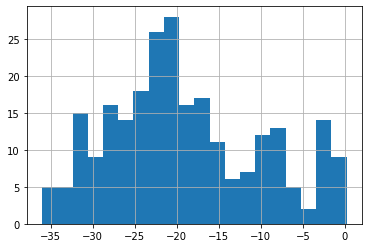

In [50]:
df_t4.loc['2021-01']['T'].hist(bins=20)

<AxesSubplot:ylabel='Density'>

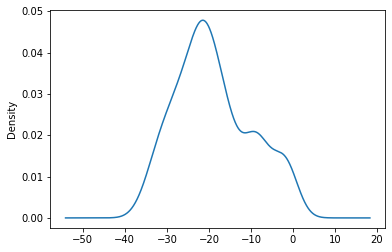

In [51]:
df_t4.loc['2021-01']['T'].plot.kde(bw_method=0.3)

<AxesSubplot:ylabel='Density'>

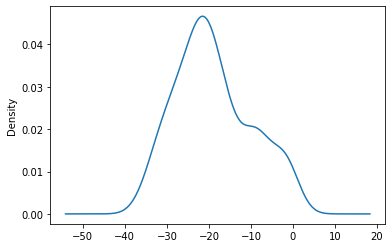

In [52]:
df_t4.loc['2021-01']['T'].plot.density()

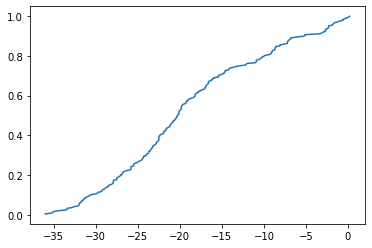

In [53]:
from statsmodels.distributions.empirical_distribution import ECDF
import matplotlib.pyplot as plt
ecdf = ECDF(df_t4.loc['2021-01']['T'].values)
plt.plot(ecdf.x, ecdf.y)

In [54]:
# from scipy.stats import norm
# # plt.plot(norm.pdf(df_t4.loc['2021-01']['T'].values))

# x = np.linspace(norm.ppf(0.01), norm.ppf(0.99), 248)
# data = df_t4.loc['2021-01']['T'].values
# fig, ax = plt.subplots(1, 1)
# ax.plot(x, norm.pdf(data),'r-', lw=5, alpha=0.6, label='norm pdf')



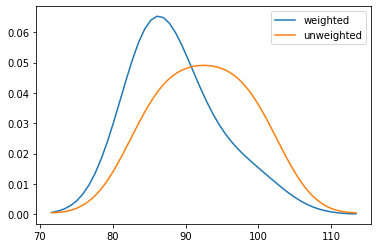

In [55]:
from statsmodels.nonparametric.kde import KDEUnivariate

df = pd.DataFrame({'observed_scores': [100, 95, 90, 85],
                   'counts': [1534, 1399, 3421, 8764]})

kde1= KDEUnivariate(df.observed_scores)
kde_noweight = KDEUnivariate(df.observed_scores)
kde1.fit(weights=df.counts, fft=False)
kde_noweight.fit()
plt.plot(kde1.support, kde1.density)
plt.plot(kde_noweight.support, kde_noweight.density)
plt.legend(['weighted', 'unweighted'])

In [82]:
df_t.groupby(df_t.index.month).mean()['T'].head(12)

Местное время в Тюмени
1    -16.355890
2    -13.266179
3     -4.279772
4      5.111182
5     12.045172
6     17.027050
7     18.825393
8     16.609128
9     10.246331
10     3.121967
11    -5.659066
12   -12.332639
Name: T, dtype: float64

In [89]:
df_t_2020 = df_t.loc['2020']
df_t_2020.groupby(df_t_2020.index.month).agg({'T': ['mean', 'min', 'max']})

T            
                             mean   min   max
Местное время в Тюмени                       
1                       -9.838105 -27.1   1.3
2                       -5.849138 -25.0   4.1
3                        0.654435 -13.0  13.0
4                        6.812917  -4.9  24.9
5                       14.906048  -1.3  30.9
6                       14.566250   3.3  31.4
7                       21.522984   9.2  35.0
8                       18.268548   7.4  34.9
9                       10.132917  -0.3  23.6
10                       3.941129  -9.6  18.2
11                      -6.162500 -21.1   6.0
12                     -13.186694 -31.3  -2.3

In [90]:
df_t_2020.groupby(df_t_2020.index.month).std().head(12)

,T,Po,P,Pa,U,Ff,Tn,Tx,Td,tR
Местное время в Тюмени,,,,,,,,,,
1,5.678360,9.189464,9.415035,2.081321,6.640991,1.119938,6.207421,4.741936,5.897538,0.0
2,5.520172,6.960917,7.050352,1.041903,10.163339,1.325736,6.032885,4.820911,5.328706,0.0
3,4.394906,8.188481,8.365065,1.288730,18.047367,1.328380,4.355999,4.114122,4.892276,0.0
4,5.813514,5.995915,6.072983,1.157788,22.993721,1.765423,4.340088,5.808536,4.800865,0.0
5,6.663272,5.433616,5.494917,0.877254,24.542815,1.439697,4.255736,6.208149,5.087200,0.0
6,6.441327,6.288006,6.309321,0.768630,23.313965,1.249540,3.878391,6.149176,3.567713,0.0
7,6.375040,2.287316,2.299159,0.465071,22.195052,1.186802,3.826737,5.287455,3.724297,0.0
8,5.989192,6.423824,6.430670,0.597109,21.337086,1.085052,3.877171,6.205933,3.031204,0.0
9,4.761504,10.080021,10.227144,1.194351,16.679353,1.331519,3.771090,4.479434,3.302295,0.0


In [ ]:
# Temperature: below -15 -20 -25

In [ ]:
# with abs diff >= 2

In [ ]:
# with abs diff <= 3

In [ ]:
# df_merged['diff'] = df_merged['T'] - df_merged['T_a']
# df_merged['abs_diff'] = abs(df_merged['T'] - df_merged['T_a'])

